### **COVID - 19 and X Dataset** ###

We are chosing all the counties (Kings, Queens, Richmond, Bronx, New York) from New York City. <br>

For the **Covid19** dataset, we have chosen the **population data, number of cases and confirmed cases data**. <br>
This data is taken from the following site: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/ <br>

For the **X** dataset, we have chosen the **motor vechicle collision crashes data**. <br>
This data is taken from the following site: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95 <br>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd '/content/drive/My Drive/Colab Notebooks/data'

/content/drive/My Drive/Colab Notebooks/data


#### **Covid 19 Dataset** ####
There are 3 separate csv files that is covid_county_population_usafacts.csv, covid_confirmed_usafacts.csv and covid_deaths_usafacts.csv which contains the data of population, confirmed cases and deaths respectively from the time period of 1/22/2020 to 05/05/2020. The data is for all the counties present in the United States and we will take the subset of the counties we are working on. 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re 

In [0]:
### Defining the counties name ###
counties_name = ['Bronx County','Kings County','Richmond County','Queens County','New York County']

In [0]:
### Loading the 3 datasets for Covid19 ###
counties_population = pd.read_csv('covid_county_population_usafacts.csv')
counties_confirmed = pd.read_csv('covid_confirmed_usafacts.csv')
counties_death = pd.read_csv('covid_deaths_usafacts.csv')

In [0]:
### Getting the subset with the counties we are working on ###
counties_population = counties_population[counties_population['County Name'].isin(counties_name) & (counties_population['State'] == 'NY')]
counties_confirmed = counties_confirmed[counties_confirmed['County Name'].isin(counties_name) & (counties_confirmed['State'] == 'NY')]
counties_death = counties_death[counties_death['County Name'].isin(counties_name) & (counties_death['State'] == 'NY')]

# **Task 1** 
**Expectations** <br>
Clean your dataset (remove missing values, sanitize data, etc.). Remove any outliers using the Tukey’s rule from class. Report what you found (number of outliers). Comment on your findings both for data cleaning (what issues you found, how you dealt with them) and outlier detection. 

**Explanation** <br>
Below we have checked and remove missing values, detected, removed and report the number of outliers and details of the findings. <br>
In the dataset, the date format (column names) in the confirmed and death csv files varied. The format is of type MM/DD/YY and 
also of type MM-DD-YY. Notebook automatically handles this diperancy when loading the date data. The data column in the pandas is now consistent with **MM/DD/YY** format. 

In [0]:
### Checking for null values in the Covid Dataset ###
print(counties_population.isnull().values.any())
print(counties_confirmed.isnull().values.any())
print(counties_death.isnull().values.any())

False
False
False


**There are no null values or missing values in any of the field in the Covid19 dataset.** <br> 

Covid19 Dataset has values of counties in rows and dates in the columns. I have transposed the dataframe for confirmed and death cases such that counties name are now columns names and dates are rows name. <br> 
Also, an aggregation of confirmed and death cases have been taken and a new aggregated result row have been created. <br> 

In [0]:
### Transpose Confirmed and death cases dataframe ###
counties_population_T = counties_population.transpose()
counties_confirmed_T = counties_confirmed.transpose()
counties_death_T = counties_death.transpose()

In [0]:
counties_population_T.columns = counties_population_T.loc['County Name']
counties_confirmed_T.columns = counties_confirmed_T.loc['County Name']
counties_death_T.columns = counties_death_T.loc['County Name']

Removing all the other rows other than dates as they are not required for any further processing. 

In [0]:
counties_population_T.drop(['countyFIPS','County Name','State'],inplace=True)
counties_confirmed_T.drop(['countyFIPS','County Name', 'State', 'stateFIPS'],inplace= True)
counties_death_T.drop(['countyFIPS','County Name', 'State', 'stateFIPS'],inplace= True)

We will check the outliers for the aggregated confirmed and the death cases per date for NY. 

In [0]:
### Given values are cumulative values, subtracting it from the previous value to get data per day ###
counties_death_T = counties_death_T.diff()
counties_confirmed_T = counties_confirmed_T.diff()

In [0]:
counties_death_T.fillna(0, inplace=True)
counties_confirmed_T.fillna(0, inplace=True)

In [0]:
aggregated_confirmed = counties_confirmed_T.sum(axis=1)
aggregated_death = counties_death_T.sum(axis=1)

In [0]:
#### Tukey's rule to check for outliers in the aggregated Confirmed and death cases dataset ####
### alpha is taken as 1.5 ###
def outlier_detection(df):
    n = df.size
    df = df.sort_values(ascending=True)
    q1 = df[int(np.ceil(0.25*n))]
    q3 = df[int(np.ceil(0.75*n))]
    iqr = q3 - q1
    
    alpha = 1.5
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    
    return df[((df < lower_limit) | (df > upper_limit))]

Outlier county values as cumulative confirmed and death cases.

In [0]:
print(outlier_detection(aggregated_confirmed))
print(outlier_detection(aggregated_death))

04-03-2020    8143
dtype: int64
04-10-2020     821
4/19/20       1316
4/14/20       2949
dtype: int64


Outlier values applied per date on confirmed and death cases. Total count of such outliers will be reported. 

In [0]:
#  outliers_count = 0
# n = counties_confirmed_T.shape[0]
# for index in range(n):
#         if outlier_detection(counties_confirmed_T.iloc[index]) or outlier_detection(counties_death_T.iloc[index]): 
#             outliers_count = outliers_count + 1 

In [0]:
remove_outliers = ['04-03-2020','04-10-2020','4/19/20','4/14/20']
outliers_count = len(remove_outliers)
outliers_count

4

In [0]:
### Removing outlier values ###
counties_confirmed_T.drop(remove_outliers, inplace=True)
counties_death_T.drop(remove_outliers, inplace=True)

**Covid19 dataset have a total of 4 outliers either in confirmed and death cases.** <br>
**Number of outliers removal = 4. We have removed those 4 values from Covid and X dataset** <br>

#### **X Dataset** ####

Our X dataset is Motor Vehicle collisions before and after Covid19. <br>
The dataset after collision is taken from the time period **01/22/20 to 05/08/20**, same as the date range of our covid19 database. <br>
The dataset before collision is taken for the same time period but in the year 2019 i.e **01/22/19 to 05/08/19**, so that external factors affecting due to periodicty remains same. <br> 
These datasets have information of number of people injured and number of people died, were those people pedestrians or cyclists or were driving motor vechicles. Also, the data is provided for each timestamp in a day when the incident is reported. <br>
The 4 outlier values are removed from the X dataset. <br>

In [0]:
### Loading the before and after covid motor vehicle collisions dataset ###
collisions_before_covid_raw = pd.read_csv('Motor_Vehicle_Collisions_Before_Covid.csv', index_col = 0)

In [0]:
collisions_after_covid_raw = pd.read_csv('Motor_Vehicle_Collisions_After_Covid.csv', index_col = 0)

In [0]:
collisions_after_covid_raw

,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
CRASH DATE,,,,,,,,,
01/22/2020,20:42,0,0,0,0,0,0,0,0
01/22/2020,03:15,0,0,0,0,0,0,0,0
01/22/2020,06:30,0,0,0,0,0,0,0,0
01/22/2020,07:50,0,0,0,0,0,0,0,0
01/22/2020,15:50,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
05-05-2020,17:45,1,0,1,0,0,0,0,0
05-05-2020,23:15,1,0,0,0,0,0,1,0
05-05-2020,08:15,0,0,0,0,0,0,0,0


In [0]:
### Aggregating all the cases that happen on a particular day ###
collision_before_covid = collisions_before_covid_raw.groupby('CRASH DATE').sum()

In [0]:
collision_after_covid = collisions_after_covid_raw.groupby('CRASH DATE').sum()

In [0]:
counties_confirmed_T.shape

(101, 5)

In [0]:
### Removing the outlier data found in counties_confirmed and counties_death from collision_before_covid and 
### collision_after_covid19 data ###
collision_before_covid.drop(['04-03-2019','04-10-2019','04/19/2019','04/14/2019'], inplace=True)
collision_after_covid.drop(['04-03-2020','04-10-2020','04/19/2020','04/14/2020'], inplace=True)

In [0]:
collision_before_covid.shape

(101, 8)

In [0]:
collision_after_covid.shape

(101, 8)

In [0]:
#@title *Task 2*: Provide basic visualization of the COVID19 and X datasets to explain the general trends in data. Use histograms, timeline plots, etc., to convey any meaningful information as you need to. Comment on your findings from the graphs. { run: "auto", vertical-output: true, form-width: "100%" }


###What is the time of the day when we observed maximum collisions post Covid? ###


In [0]:
crashes_data = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv') #Has borough information 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
crashes_data.rename(columns = {'CRASH DATE':'crash_date', 'CRASH TIME':'crash_time', 
                               'NUMBER OF PERSONS INJURED':'persons_injured', 'NUMBER OF PERSONS KILLED':'persons_killed'},inplace = True)
crashes_data['BOROUGH'].dropna(inplace = True)

In [0]:
crashes_data['crash_date'] = pd.to_datetime(crashes_data['crash_date'])
crashes_data['crash_hour'] = pd.to_datetime(crashes_data['crash_time']).dt.hour
date_hour_df = crashes_data.loc[:,["crash_date", "crash_hour"]]
date_hour_df = date_hour_df[crashes_data.crash_date.dt.year == dt.datetime.now().year] 
#Analyzing for the current year-2020

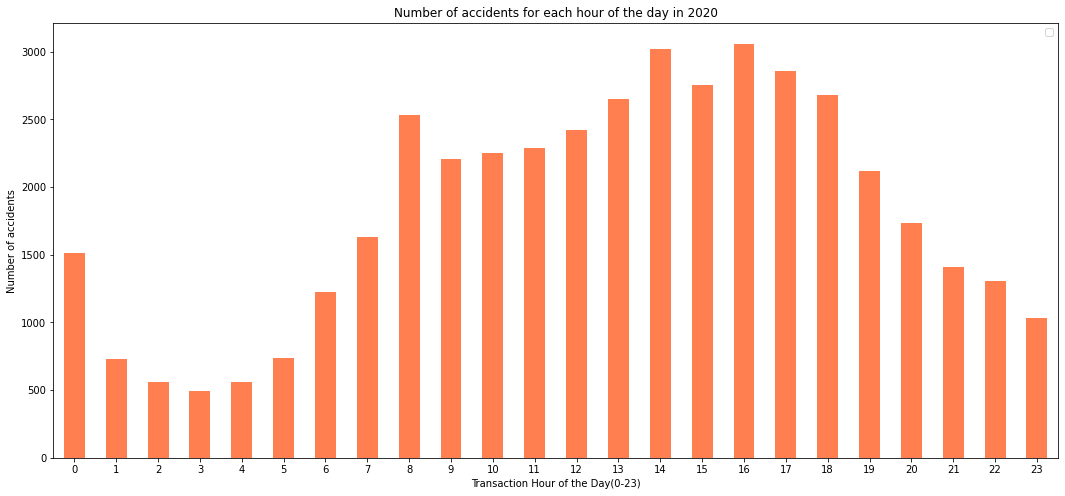

In [0]:
fig = plt.figure(figsize=(18, 8))
crash_data_hours = date_hour_df.groupby('crash_hour').count().plot(kind='bar', ax = fig.add_subplot(111), color='coral',
                                                                   title="Number of accidents for each hour of the day in 2020", align="center")
crash_data_hours.set_ylabel('Number of accidents')
crash_data_hours.set_xlabel("Transaction Hour of the Day(0-23)", )
plt.xticks(rotation=360)
plt.legend('')
plt.show()

I have extracted the hour from the crash time to get a range of hours spanning from 0-23. The plot above shows the total count of the motor vehicle collisions for the year 2020 for each hour of time from 0 to 23. This visualization is useful because it gives us some information about the time which corresponds to the maximum activity. Moreover, it does show give us information of the sleeping hours of New York based on the inactivity. Since very small number of people stay up in the night, the sleeping hours of New York will have less number of accidents. People tend to go out during the time range of 2:00pm - 6:00pm. 

###Which borough corresponds to the maximum number of crashes?##

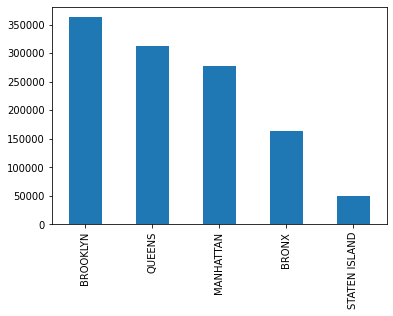

In [0]:
crashes_data['BOROUGH'].value_counts().plot(kind='bar')

We can see that Brooklyn corresponds to the maximum number of crashes post the covid

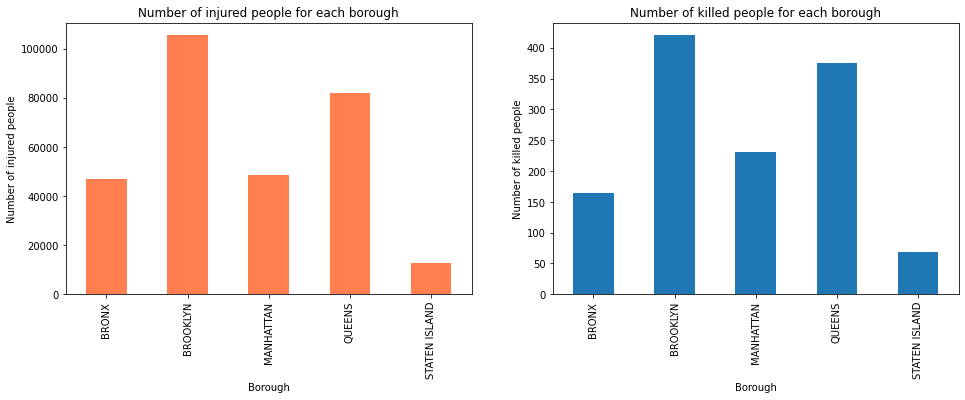

In [0]:
#@title Number of people injured and killed (Borough wise)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
injured_people = crashes_data.groupby('BOROUGH').persons_injured.sum().plot.bar(ax=ax1, color="coral", title="Number of injured people for each borough")
injured_people.set_xlabel('Borough')
injured_people.set_ylabel('Number of injured people')
killed_people = crashes_data.groupby('BOROUGH').persons_killed.sum().plot.bar(ax=ax2, title="Number of killed people for each borough")
killed_people.set_xlabel('Borough')
killed_people.set_ylabel('Number of killed people')
plt.show()

**County-wise Population satistics**

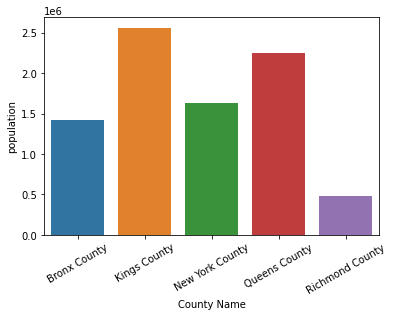

In [0]:
# County-wise Population satistics
ax1 = sns.barplot(x="County Name", y="population", data=counties_population)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
ax1

**County-wise time series of number of confirmed cases of COVID-19**

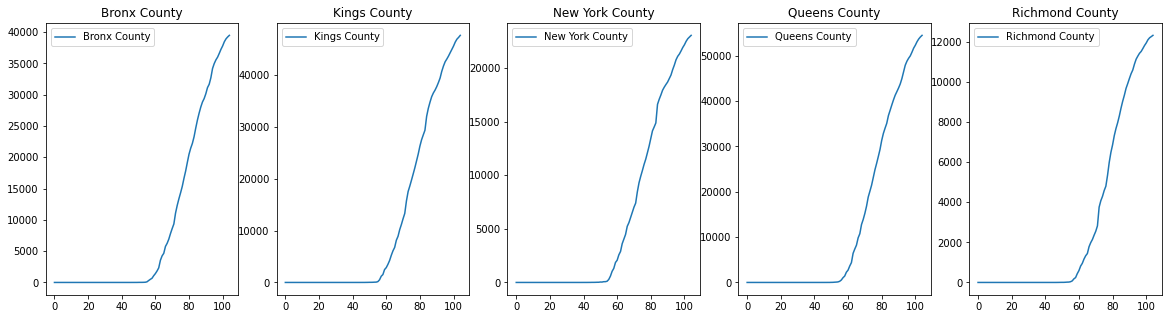

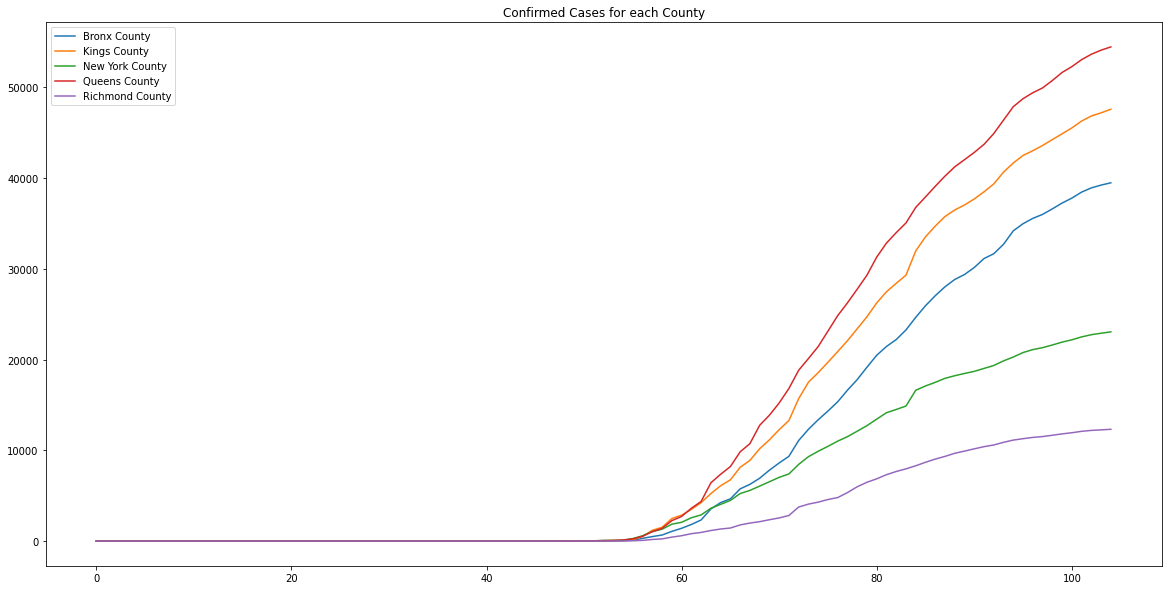

In [0]:
# County-wise time series of number of confirmed cases of COVID-19
def plot_line(counties_confirmed, fig1, fig2):
    i=0
    counties_confirmed = counties_confirmed.rename(columns={"County Name": "CountyName"})    
    for county in counties_confirmed.CountyName:
        df = counties_confirmed[counties_confirmed['CountyName']==county]
        df = df.drop(['CountyName','countyFIPS','State','stateFIPS'],axis=1)
        df = df.T
        df.columns = [county]
        df['date'] = df.index
        df = df.reset_index(drop=True)
        df['date'] = df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
        df.plot(ax=axes[i], title=county)
        df.plot(ax=axis, title='Confirmed Cases for each County', label=county)
        i = i+1
    return
        
fig1, axes = plt.subplots(1,5, figsize=(20,5))
fig2, axis = plt.subplots(1, figsize=(20,10))
plot_line(counties_confirmed, fig1, fig2)

**County-wise time series of number of deaths due to COVID-19**

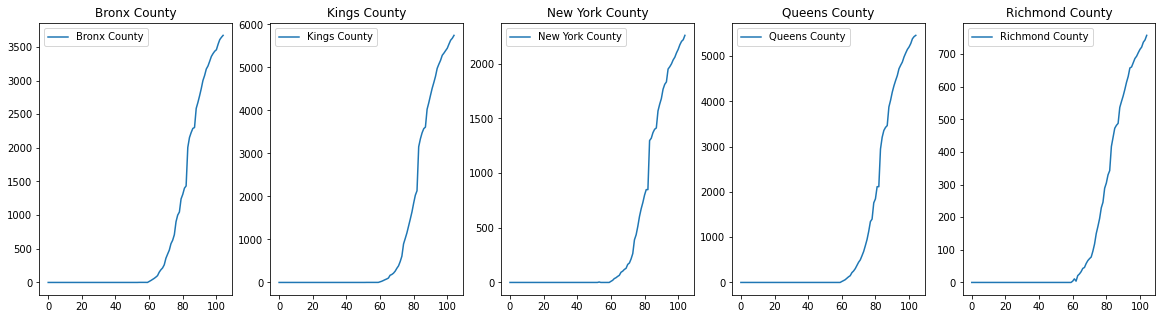

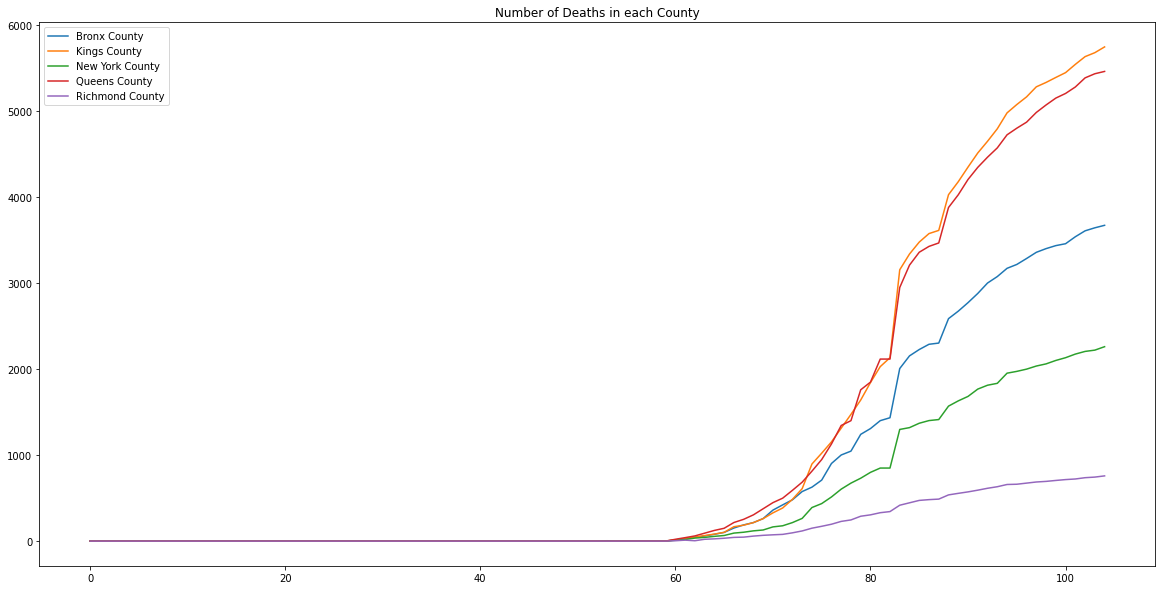

In [0]:
# County-wise time series of number of deaths due to COVID-19
def plot_line(counties_death, fig1, fig2):
    i=0
    counties_death = counties_death.rename(columns={"County Name": "CountyName"})    
    for county in counties_death.CountyName:
        df = counties_death[counties_death['CountyName']==county]
        df = df.drop(['CountyName','countyFIPS','State','stateFIPS'],axis=1)
        df = df.T
        df.columns = [county]
        df['date'] = df.index
        df = df.reset_index(drop=True)
        df['date'] = df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
        df.plot(ax=axes[i], title=county)
        df.plot(ax=axis, title='Number of Deaths in each County', label=county)
        i = i+1
    return
        
fig1, axes = plt.subplots(1,5, figsize=(20,5))
fig2, axis = plt.subplots(1, figsize=(20,10))
plot_line(counties_death, fig1, fig2)

**Number of Persons Injured against Square Root of Number of Confirmed Cases & Deaths of COVID-19**

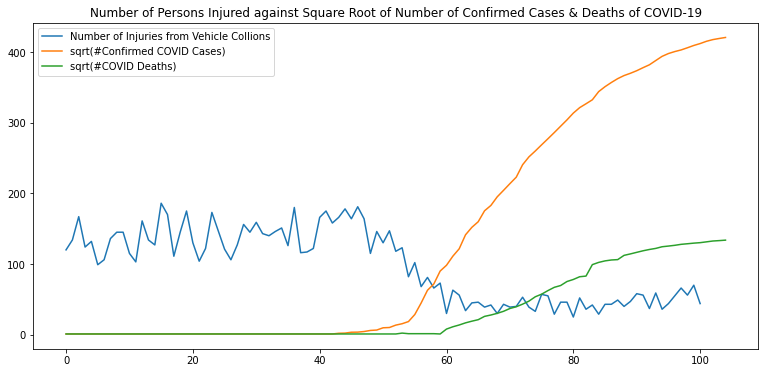

In [0]:
# Number of Persons Injured against Square Root of Number of Confirmed Cases & Deaths of COVID-19
# scatterplot matrix between #num cases, # num deaths #crashes (AFTER COVID)
def plot_cases_covid_x(collision_after_covid, counties_confirmed, counties_death):
    scatter = pd.DataFrame()
    fig3, axis = plt.subplots(1, figsize=(13,6))
    df = collision_after_covid
    df['date'] = df.index
    df = df[['date','NUMBER OF PERSONS INJURED']]
    df = df.reset_index(drop=True)
    df['date'] = df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
    df.plot(ax=axis)
    scatter['collisions'] = df['NUMBER OF PERSONS INJURED']
    ##
    df = counties_confirmed
    df = df.drop(['County Name','countyFIPS','State','stateFIPS'],axis=1)
    df = df.sum()
    df = df.replace(0,1)
    df = df.apply(np.sqrt)
    df = df.to_frame()
    
    df['date'] = df.index
    df = df.reset_index(drop=True)
    df['date'] = df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
    df.plot(ax=axis, title='Number of Persons Injured against Square Root of Number of Confirmed Cases of COVID-19')
    scatter['confirmed_cases'] = df[0]
    ##
    df = counties_death
    df = df.drop(['County Name','countyFIPS','State','stateFIPS'],axis=1)
    df = df.sum()
    df = df.replace(0,1)
    df = df.apply(np.sqrt)
    df = df.to_frame()
    
    df['date'] = df.index
    df = df.reset_index(drop=True)
    df['date'] = df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
    df.plot(ax=axis, title='Number of Persons Injured against Square Root of Number of Confirmed Cases & Deaths of COVID-19')
    scatter['deaths'] = df[0]
    axis.legend(["Number of Injuries from Vehicle Collions", "sqrt(#Confirmed COVID Cases)", "sqrt(#COVID Deaths)"]);
    
    return scatter
scatter = plot_cases_covid_x(collision_after_covid, counties_confirmed, counties_death)

# **Scatterplot Matrix for visualizing bivariate relationships b/w X and COVID datasets**
A Scatterplot Matrix showing bivariate relationships between the number of collisions, the number of confirmed COVID-19 cases and the number of deaths due to COVID. As we can see, the #confirmed COVID cases and deaths are positively correlated. While the number of collisions is negatively correlated with both the number of confirmed COVID cases as well as the number of deaths.

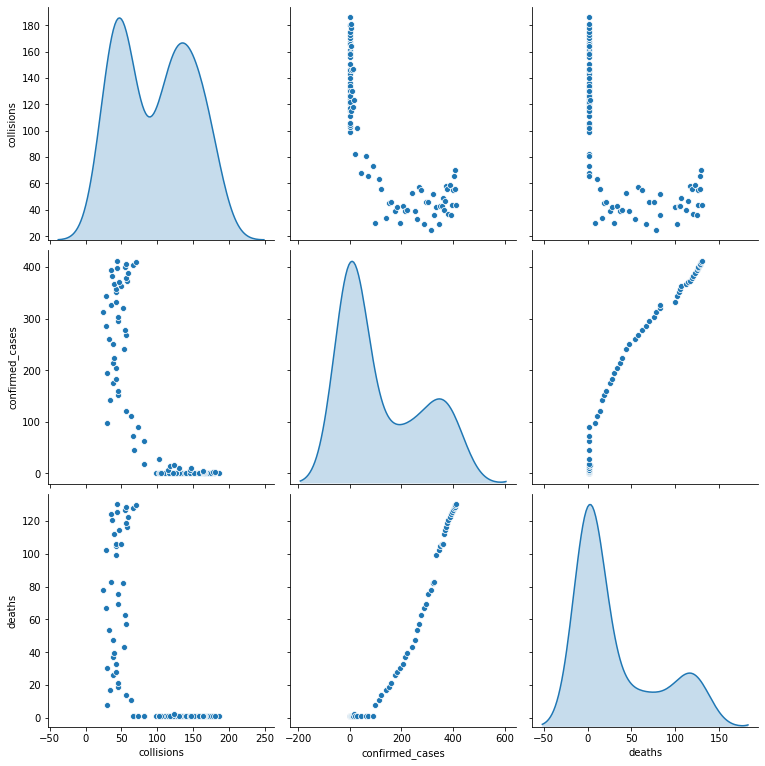

In [0]:
sns.pairplot(data=scatter,palette="husl",diag_kind="kde",height=3.5)

## **Required Inference 1**
Use your COVID19 dataset to predict the COVID19 fatality and #cases for the next one week. Use the following four prediction techniques: (i) **AR(3)**, (ii)**AR(5)** , (iii) **EWMA** with alpha = **0.5**, and (iv) **EWMA** with alpha = **0.8**. Make sure that your dataset allows you to verify the one week prediction. For example, use the first three weeks of data to predict the fourth week, and report the accuracy of your predictions using the actual fourth week data. Use metrics learned in class (MAPE as a % and MSE) to report accuracy numbers.


In [0]:
# function to split time series into train and test sets based on a given split ratio (train/test)
def get_test_train_split(data, split_ratio=0.9):
    train_size = int(split_ratio*data.shape[0])
    train = data[:train_size]
    test  = data[train_size:]
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    return train, test

In [0]:
def get_time_series(df, county):
    if(county=="all"):
        df = df.drop(['County Name','countyFIPS','State','stateFIPS'],axis=1)
        df = df.sum()
        df = df.to_frame()
        df['date'] = df.index
        df = df.reset_index(drop=True)
        df['date'] = df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
        df.plot(ax=axis, title='Number of Persons Injured against Square Root of Number of Confirmed Cases of COVID-19')
        df.columns = ['count','date']
        return df
    else:
        df = df[counties_confirmed['County Name']==county]
        df = df.drop(['County Name','countyFIPS','State','stateFIPS'],axis=1)
        df = df.T
        df['date'] = df.index
        df = df.reset_index(drop=True)
        df['date'] = df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
        df.plot(ax=axis, title='Number of Persons Injured against Square Root of Number of Confirmed Cases of COVID-19')
        df.columns = ['count','date']
        return df

**Exponentially Weighted Moving Average (EWMA)**

In [0]:
def plot_ewma(plot_x, test, predictions):
    plt.plot(plot_x,test,label="original")
    plt.plot(plot_x,predictions,label="Predictions")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    plt.xticks(rotation=30)
    plt.show()
    
class EWMA:
    def __init__(self, alpha):
        self.alpha = alpha

    def fit(self,data):
        y_t_hat = data['count'][0]
        for t in range(data.shape[0]):
            y_t = data['count'][t]
            y_t_hat = self.alpha*y_t + (1-self.alpha)*y_t_hat
#             print("Date: " + str(data['date'][t]) + " - Test Prediction: "  + "{:5.2f}".format(y_t_hat) + " Actual: " + "{:5.2f}".format(y_t))
        self.y_t_hat = y_t_hat

    def predict(self,test):
        y_t_hat = self.y_t_hat
        mse_errors = np.zeros(len(test))
        mape_errors = np.zeros(len(test))
        predictions = np.zeros(len(test))
        for t in range(len(test)):
            y_t = test['count'][t]
            residual = y_t_hat - y_t
            print("Date: " + str(test['date'][t]) + " - Test Prediction: " + "{:5.2f}".format(y_t_hat) + ", Actual: " + "{:5.2f}".format(y_t))
            mape_errors[t] = (abs(residual)/y_t)*100
            mse_errors[t] = residual**2
            predictions[t] = y_t_hat = self.alpha*y_t + (1-self.alpha)* y_t_hat
        plot_ewma(np.array(test['date']), test['count'], predictions)
        print("-------------------------------------------------------------------")
        print("MAPE:" + "{:5.2f}".format(np.mean(mape_errors)))
        print("MSE:" + "{:5.2f}".format(np.mean(mse_errors)))        
        
#taking log
# class EWMA:
#     def __init__(self, alpha):
#         self.alpha = alpha

#     def fit(self,data):
#         y_t_hat = data['count'][0]
#         for t in range(data.shape[0]):
#             y_t = np.log(data['count'][t]+1)
#             y_t_hat = self.alpha*y_t + (1-self.alpha)*y_t_hat
#             print("Date: " + str(data['date'][t]) + " - Test Prediction: "  + "{:5.2f}".format(y_t_hat) + " Actual: " + "{:5.2f}".format(y_t))
#         self.y_t_hat = y_t_hat

#     def predict(self,test):
#         y_t_hat = np.exp(self.y_t_hat)-1
#         mse_errors = np.zeros(len(test))
#         mape_errors = np.zeros(len(test))
#         for t in range(len(test)):
#             y_t = test['count'][t]
#             residual = y_t_hat - y_t
#             print("Date: " + str(test['date'][t]) + " - Test Prediction: " + "{:5.2f}".format(y_t_hat) + ", Actual: " + "{:5.2f}".format(y_t))
#             mape_errors[t] = (abs(residual)/y_t)*100
#             mse_errors[t] = residual**2
#             y_t_hat = self.alpha*y_t + (1-self.alpha)* y_t_hat

#         print("MAPE:" + "{:5.2f}".format(np.mean(mape_errors)))
#         print("MSE:" + "{:5.2f}".format(np.mean(mse_errors)))        

**Exponentially Weighted Moving Average (Confirmed COVID Cases in March 2020)**

--------------------------- EWMA(0.5) -----------------------------
Date: 24/03/2020 - Test Prediction: 10077.06, Actual: 14769.00
Date: 25/03/2020 - Test Prediction: 12423.03, Actual: 19976.00
Date: 26/03/2020 - Test Prediction: 16199.51, Actual: 23076.00
Date: 27/03/2020 - Test Prediction: 19637.76, Actual: 25537.00
Date: 28/03/2020 - Test Prediction: 22587.38, Actual: 30730.00
Date: 29/03/2020 - Test Prediction: 26658.69, Actual: 33440.00
Date: 30/03/2020 - Test Prediction: 30049.34, Actual: 38052.00
Date: 31/03/2020 - Test Prediction: 34050.67, Actual: 41736.00


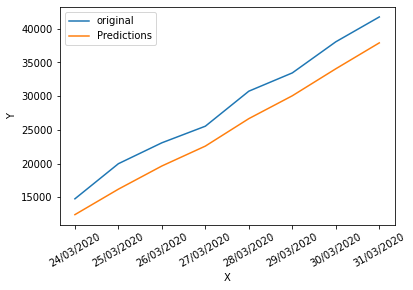

-------------------------------------------------------------------
MAPE:26.09
MSE:49568004.13
--------------------------- EWMA(0.8) -----------------------------
Date: 24/03/2020 - Test Prediction: 11708.12, Actual: 14769.00
Date: 25/03/2020 - Test Prediction: 14156.82, Actual: 19976.00
Date: 26/03/2020 - Test Prediction: 18812.16, Actual: 23076.00
Date: 27/03/2020 - Test Prediction: 22223.23, Actual: 25537.00
Date: 28/03/2020 - Test Prediction: 24874.25, Actual: 30730.00
Date: 29/03/2020 - Test Prediction: 29558.85, Actual: 33440.00
Date: 30/03/2020 - Test Prediction: 32663.77, Actual: 38052.00
Date: 31/03/2020 - Test Prediction: 36974.35, Actual: 41736.00


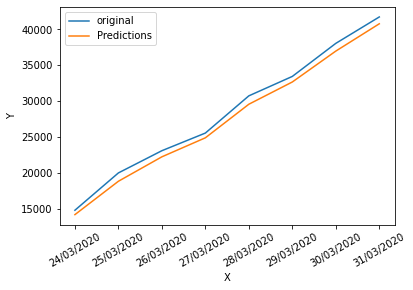

-------------------------------------------------------------------
MAPE:17.19
MSE:21681571.60


In [0]:
# Exponentially Weighted Moving Average (Confirmed COVID Cases in March 2020)
# time series for the month of March (03/01/2020 to 03/31/2020)
# we will predict Confirmed Covid Cases
# for all Counties
# print("Exponentially Weighted Moving Average (Confirmed COVID Cases in March 2020)")
ts_all_counties_march = get_time_series(counties_confirmed, "all")[39:70]
train_all_counties_march, test_all_counties_march = get_test_train_split(ts_all_counties_march, split_ratio=0.75)
print("--------------------------- EWMA(0.5) -----------------------------")
ewma = EWMA(0.5)
ewma.fit(train_all_counties_march)
ewma.predict(test_all_counties_march)

print("--------------------------- EWMA(0.8) -----------------------------")
ewma = EWMA(0.8)
ewma.fit(train_all_counties_march)
ewma.predict(test_all_counties_march)

**Exponentially Weighted Moving Average (Confirmed COVID Cases in April 2020)**

--------------------------- EWMA(0.5) -----------------------------
Date: 23/04/2020 - Test Prediction: 139692.49, Actual: 145855.00
Date: 24/04/2020 - Test Prediction: 142773.74, Actual: 150473.00
Date: 25/04/2020 - Test Prediction: 146623.37, Actual: 155113.00
Date: 26/04/2020 - Test Prediction: 150868.19, Actual: 158258.00
Date: 27/04/2020 - Test Prediction: 154563.09, Actual: 160489.00
Date: 28/04/2020 - Test Prediction: 157526.05, Actual: 162338.00
Date: 29/04/2020 - Test Prediction: 159932.02, Actual: 164841.00
Date: 30/04/2020 - Test Prediction: 162386.51, Actual: 167478.00


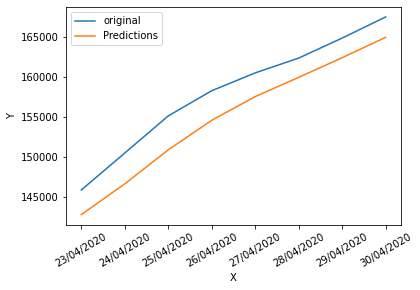

-------------------------------------------------------------------
MAPE: 4.02
MSE:41528859.38
--------------------------- EWMA(0.8) -----------------------------
Date: 23/04/2020 - Test Prediction: 141973.48, Actual: 145855.00
Date: 24/04/2020 - Test Prediction: 145078.70, Actual: 150473.00
Date: 25/04/2020 - Test Prediction: 149394.14, Actual: 155113.00
Date: 26/04/2020 - Test Prediction: 153969.23, Actual: 158258.00
Date: 27/04/2020 - Test Prediction: 157400.25, Actual: 160489.00
Date: 28/04/2020 - Test Prediction: 159871.25, Actual: 162338.00
Date: 29/04/2020 - Test Prediction: 161844.65, Actual: 164841.00
Date: 30/04/2020 - Test Prediction: 164241.73, Actual: 167478.00


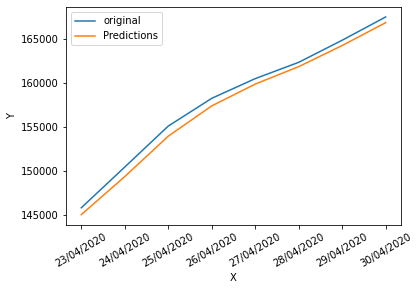

-------------------------------------------------------------------
MAPE: 2.48
MSE:16292561.39
-------------------------------------------------------------------


In [0]:
# Exponentially Weighted Moving Average (Confirmed COVID Cases in April 2020)
# time series for the month of April (04/01/2020 to 04/30/2020)
# we will predict 
# for all Counties
# print("Exponentially Weighted Moving Average (Confirmed COVID Cases in April 2020)")
ts_all_counties_april = get_time_series(counties_confirmed, "all")[70:100]
train_all_counties_april, test_all_counties_april = get_test_train_split(ts_all_counties_april, split_ratio=0.75)
print("--------------------------- EWMA(0.5) -----------------------------")
ewma = EWMA(0.5)
ewma.fit(train_all_counties_april)
ewma.predict(test_all_counties_april)
print("--------------------------- EWMA(0.8) -----------------------------")
ewma = EWMA(0.8)
ewma.fit(train_all_counties_april)
ewma.predict(test_all_counties_april)
print("-------------------------------------------------------------------")

**Exponentially Weighted Moving Average (COVID Deaths in March 2020)**

Exponentially Weighted Moving Average (COVID Deaths in March 2020)
--------------------------- EWMA(0.5) -----------------------------
Date: 24/03/2020 - Test Prediction: 78.63, Actual: 188.00
Date: 25/03/2020 - Test Prediction: 133.31, Actual: 280.00
Date: 26/03/2020 - Test Prediction: 206.66, Actual: 365.00
Date: 27/03/2020 - Test Prediction: 285.83, Actual: 450.00
Date: 28/03/2020 - Test Prediction: 367.91, Actual: 671.00
Date: 29/03/2020 - Test Prediction: 519.46, Actual: 775.00
Date: 30/03/2020 - Test Prediction: 647.23, Actual: 912.00
Date: 31/03/2020 - Test Prediction: 779.61, Actual: 1095.00


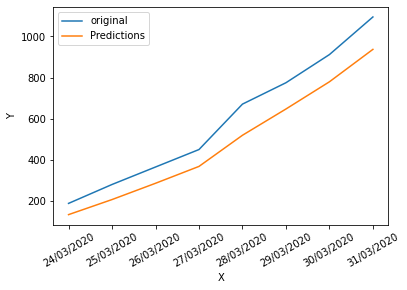

-------------------------------------------------------------------
MAPE:40.80
MSE:51529.88
--------------------------- EWMA(0.8) -----------------------------
Date: 24/03/2020 - Test Prediction: 110.13, Actual: 188.00
Date: 25/03/2020 - Test Prediction: 172.43, Actual: 280.00
Date: 26/03/2020 - Test Prediction: 258.49, Actual: 365.00
Date: 27/03/2020 - Test Prediction: 343.70, Actual: 450.00
Date: 28/03/2020 - Test Prediction: 428.74, Actual: 671.00
Date: 29/03/2020 - Test Prediction: 622.55, Actual: 775.00
Date: 30/03/2020 - Test Prediction: 744.51, Actual: 912.00
Date: 31/03/2020 - Test Prediction: 878.50, Actual: 1095.00


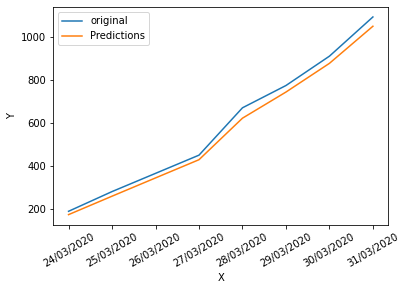

-------------------------------------------------------------------
MAPE:28.32
MSE:24642.29
-------------------------------------------------------------------


In [0]:
# Exponentially Weighted Moving Average (COVID Deaths in March 2020)
# time series for the month of March (03/01/2020 to 03/31/2020)
# we will predict Confirmed Covid Cases
# for all Counties
print("Exponentially Weighted Moving Average (COVID Deaths in March 2020)")
ts_all_counties_march = get_time_series(counties_death, "all")[39:70]
train_all_counties_march, test_all_counties_march = get_test_train_split(ts_all_counties_march, split_ratio=0.75)
print("--------------------------- EWMA(0.5) -----------------------------")
ewma = EWMA(0.5)
ewma.fit(train_all_counties_march)
ewma.predict(test_all_counties_march)

print("--------------------------- EWMA(0.8) -----------------------------")
ewma = EWMA(0.8)
ewma.fit(train_all_counties_march)
ewma.predict(test_all_counties_march)
print("-------------------------------------------------------------------")

**Exponentially Weighted Moving Average (COVID Deaths in April 2020)**

Exponentially Weighted Moving Average (COVID Deaths in April 2020)
--------------------------- EWMA(0.5) -----------------------------
Date: 23/04/2020 - Test Prediction: 13547.11, Actual: 14537.00
Date: 24/04/2020 - Test Prediction: 14042.05, Actual: 14905.00
Date: 25/04/2020 - Test Prediction: 14473.53, Actual: 15482.00
Date: 26/04/2020 - Test Prediction: 14977.76, Actual: 15725.00
Date: 27/04/2020 - Test Prediction: 15351.38, Actual: 15992.00
Date: 28/04/2020 - Test Prediction: 15671.69, Actual: 16343.00
Date: 29/04/2020 - Test Prediction: 16007.35, Actual: 16556.00
Date: 30/04/2020 - Test Prediction: 16281.67, Actual: 16780.00


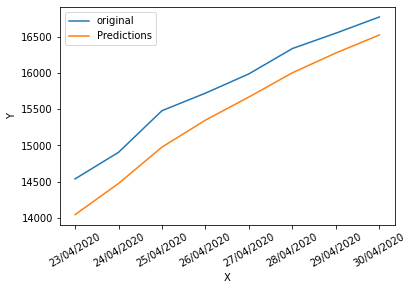

-------------------------------------------------------------------
MAPE: 4.78
MSE:588792.57
--------------------------- EWMA(0.8) -----------------------------
Date: 23/04/2020 - Test Prediction: 13965.07, Actual: 14537.00
Date: 24/04/2020 - Test Prediction: 14422.61, Actual: 14905.00
Date: 25/04/2020 - Test Prediction: 14808.52, Actual: 15482.00
Date: 26/04/2020 - Test Prediction: 15347.30, Actual: 15725.00
Date: 27/04/2020 - Test Prediction: 15649.46, Actual: 15992.00
Date: 28/04/2020 - Test Prediction: 15923.49, Actual: 16343.00
Date: 29/04/2020 - Test Prediction: 16259.10, Actual: 16556.00
Date: 30/04/2020 - Test Prediction: 16496.62, Actual: 16780.00


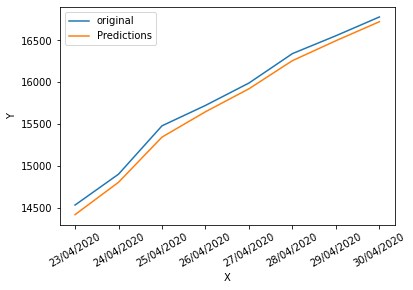

-------------------------------------------------------------------
MAPE: 2.76
MSE:202224.42
-------------------------------------------------------------------


In [0]:
# Exponentially Weighted Moving Average (COVID Deaths in April 2020)
# time series for the month of April (04/01/2020 to 04/30/2020)
# we will predict 
# for all Counties
print("Exponentially Weighted Moving Average (COVID Deaths in April 2020)")
ts_all_counties_april = get_time_series(counties_death, "all")[70:100]
train_all_counties_april, test_all_counties_april = get_test_train_split(ts_all_counties_april, split_ratio=0.75)
print("--------------------------- EWMA(0.5) -----------------------------")
ewma = EWMA(0.5)
ewma.fit(train_all_counties_april)
ewma.predict(test_all_counties_april)
print("--------------------------- EWMA(0.8) -----------------------------")
ewma = EWMA(0.8)
ewma.fit(train_all_counties_april)
ewma.predict(test_all_counties_april)
print("-------------------------------------------------------------------")

**Auto Regression**

In [0]:
def plot_ar(plot_x, test, predictions):
    plt.plot(plot_x,test,label="original")
    plt.plot(plot_x,predictions,label="Predictions")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    plt.xticks(rotation=30)
    plt.show()
    
class AR:
    def __init__(self, p):
        self.p = p
    
    def fit(self, train):
        self.data = np.array(train['count'])
        self.dates = train['date']
        return
    
    def train_lr(self,p,curr_len):
        X = []
        Y = []
        for i in range(curr_len):
            if(i+p < curr_len):
                X.append([1])
                X[i] = X[i]+list(self.data[i:i+p])
                Y.append(self.data[i+p])
            else:
                break
        beta=np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
        return beta
        
    def predict(self, test):
        test_dates = np.array(test['date'])
        test = np.array(test['count'])
        self.data = np.hstack([self.data, test])
        p = self.p
        t = self.data.shape[0] - test.shape[0] #test data length
        error = np.zeros(test.shape[0])
        mse = np.zeros(test.shape[0])
        predictions = np.zeros(test.shape[0])
        for i in range(t,t+test.shape[0]):
            testx = [1]
            testx = np.hstack([[1], self.data[i-p:i]])
            beta = self.train_lr(p,i)
            y_t_hat = predictions[i-t] = np.matmul(testx,beta)
            y_t = self.data[i]
            error[i-t] = (abs(predictions[i-t]-self.data[i])/self.data[i])*100
            print("Date: " + str(test_dates[i-t]) + " - Test prediction: " + "{:5.2f}".format(predictions[i-t]) + " | Actual: " + str(test[i-t]) + " Error: " + "{:5.2f}".format(error[i-t]))
            residual = y_t_hat - y_t
            mse[i-t] = residual**2
        plot_ar(test_dates, test, predictions)
        
        print("MAPE: " + "{:5.2f}".format(np.mean(error)))
        print("MSE : " + "{:5.2f}".format(np.mean(mse)))
        return np.mean(error)

**Auto Regression: (Confirmed COVID Cases in March 2020)a**

--------------------------- AR(3) -----------------------------
Date: 24/03/2020 - Test prediction: 12945.41 | Actual: 14769 Error: 12.35
Date: 25/03/2020 - Test prediction: 17770.52 | Actual: 19976 Error: 11.04
Date: 26/03/2020 - Test prediction: 24639.35 | Actual: 23076 Error:  6.77
Date: 27/03/2020 - Test prediction: 30190.67 | Actual: 25537 Error: 18.22
Date: 28/03/2020 - Test prediction: 27844.96 | Actual: 30730 Error:  9.39
Date: 29/03/2020 - Test prediction: 36057.34 | Actual: 33440 Error:  7.83
Date: 30/03/2020 - Test prediction: 38684.34 | Actual: 38052 Error:  1.66
Date: 31/03/2020 - Test prediction: 42136.97 | Actual: 41736 Error:  0.96


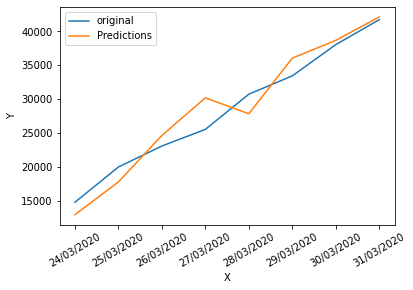

MAPE:  8.53
MSE : 6003108.21
--------------------------- AR(5) -----------------------------
Date: 24/03/2020 - Test prediction: 17952.22 | Actual: 14769 Error: 21.55
Date: 25/03/2020 - Test prediction: 16904.59 | Actual: 19976 Error: 15.38
Date: 26/03/2020 - Test prediction: 27228.15 | Actual: 23076 Error: 17.99
Date: 27/03/2020 - Test prediction: 29282.97 | Actual: 25537 Error: 14.67
Date: 28/03/2020 - Test prediction: 26668.16 | Actual: 30730 Error: 13.22
Date: 29/03/2020 - Test prediction: 37407.05 | Actual: 33440 Error: 11.86
Date: 30/03/2020 - Test prediction: 35146.14 | Actual: 38052 Error:  7.64
Date: 31/03/2020 - Test prediction: 41841.38 | Actual: 41736 Error:  0.25


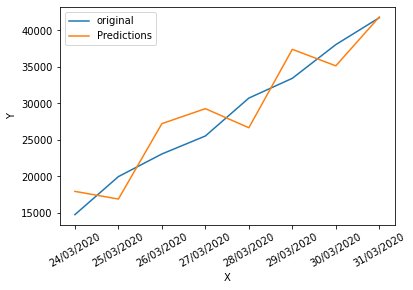

MAPE: 12.82
MSE : 11441275.70
-------------------------------------------------------------------


In [0]:
# Auto Regression: (Confirmed COVID Cases in March 2020)
# time series for the month of March (03/01/2020 to 03/31/2020)
# we will predict Confirmed Covid Cases
# for all Counties
# print("Auto Regression: (Confirmed COVID Cases in March 2020)")
ts_all_counties_march = get_time_series(counties_confirmed, "all")[39:70]
train_all_counties_march, test_all_counties_march = get_test_train_split(ts_all_counties_march, split_ratio=0.75)
print("--------------------------- AR(3) -----------------------------")
ar3 = AR(3)
ar3.fit(train_all_counties_march)
ar3.predict(test_all_counties_march)

print("--------------------------- AR(5) -----------------------------")
ar3 = AR(5)
ar3.fit(train_all_counties_march)
ar3.predict(test_all_counties_march)
print("-------------------------------------------------------------------")

**Auto Regression: (Confirmed COVID Cases in April 2020)**

--------------------------- AR(3) -----------------------------
Date: 23/04/2020 - Test prediction: 146399.92 | Actual: 145855 Error:  0.37
Date: 24/04/2020 - Test prediction: 149221.43 | Actual: 150473 Error:  0.83
Date: 25/04/2020 - Test prediction: 154274.42 | Actual: 155113 Error:  0.54
Date: 26/04/2020 - Test prediction: 158739.35 | Actual: 158258 Error:  0.30
Date: 27/04/2020 - Test prediction: 161382.88 | Actual: 160489 Error:  0.56
Date: 28/04/2020 - Test prediction: 163534.03 | Actual: 162338 Error:  0.74
Date: 29/04/2020 - Test prediction: 165247.06 | Actual: 164841 Error:  0.25
Date: 30/04/2020 - Test prediction: 167878.29 | Actual: 167478 Error:  0.24


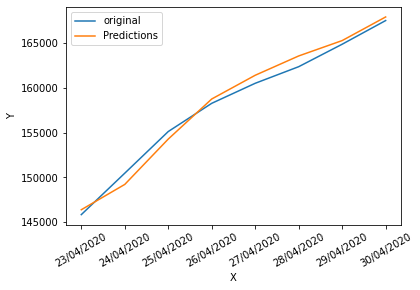

MAPE:  0.48
MSE : 669114.96
--------------------------- AR(5) -----------------------------
Date: 23/04/2020 - Test prediction: 146354.43 | Actual: 145855 Error:  0.34
Date: 24/04/2020 - Test prediction: 149078.89 | Actual: 150473 Error:  0.93
Date: 25/04/2020 - Test prediction: 154338.94 | Actual: 155113 Error:  0.50
Date: 26/04/2020 - Test prediction: 158707.40 | Actual: 158258 Error:  0.28
Date: 27/04/2020 - Test prediction: 161148.36 | Actual: 160489 Error:  0.41
Date: 28/04/2020 - Test prediction: 163055.34 | Actual: 162338 Error:  0.44
Date: 29/04/2020 - Test prediction: 164900.90 | Actual: 164841 Error:  0.04
Date: 30/04/2020 - Test prediction: 167910.57 | Actual: 167478 Error:  0.26


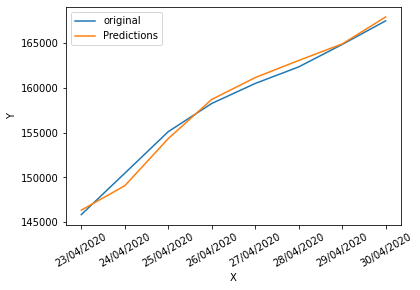

MAPE:  0.40
MSE : 516765.04
-------------------------------------------------------------------


In [0]:
# Auto Regression: (Confirmed COVID Cases in April 2020)
# time series for the month of April (04/01/2020 to 04/30/2020)
# we will predict 
# for all Counties
# print("Auto Regression: (Confirmed COVID Cases in April 2020)")
ts_all_counties_april = get_time_series(counties_confirmed, "all")[70:100]
train_all_counties_april, test_all_counties_april = get_test_train_split(ts_all_counties_april, split_ratio=0.75)
print("--------------------------- AR(3) -----------------------------")
ar3 = AR(3)
ar3.fit(train_all_counties_april)
ar3.predict(test_all_counties_april)

print("--------------------------- AR(5) -----------------------------")
ar3 = AR(5)
ar3.fit(train_all_counties_april)
ar3.predict(test_all_counties_april)
print("-------------------------------------------------------------------")

**Auto Regression: (COVID Deaths in March 2020)**

--------------------------- AR(3) -----------------------------
Date: 24/03/2020 - Test prediction: 269.28 | Actual: 188 Error: 43.23
Date: 25/03/2020 - Test prediction: 416.19 | Actual: 280 Error: 48.64
Date: 26/03/2020 - Test prediction: 429.80 | Actual: 365 Error: 17.75
Date: 27/03/2020 - Test prediction: 461.26 | Actual: 450 Error:  2.50
Date: 28/03/2020 - Test prediction: 530.65 | Actual: 671 Error: 20.92
Date: 29/03/2020 - Test prediction: 990.55 | Actual: 775 Error: 27.81
Date: 30/03/2020 - Test prediction: 1106.32 | Actual: 912 Error: 21.31
Date: 31/03/2020 - Test prediction: 1080.85 | Actual: 1095 Error:  1.29


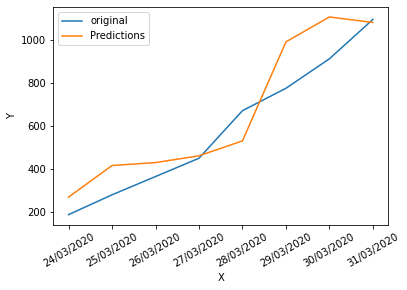

MAPE: 22.93
MSE : 16700.40
--------------------------- AR(5) -----------------------------
Date: 24/03/2020 - Test prediction: 236.21 | Actual: 188 Error: 25.64
Date: 25/03/2020 - Test prediction: 325.69 | Actual: 280 Error: 16.32
Date: 26/03/2020 - Test prediction: 503.91 | Actual: 365 Error: 38.06
Date: 27/03/2020 - Test prediction: 638.37 | Actual: 450 Error: 41.86
Date: 28/03/2020 - Test prediction: 555.71 | Actual: 671 Error: 17.18
Date: 29/03/2020 - Test prediction: 1053.71 | Actual: 775 Error: 35.96
Date: 30/03/2020 - Test prediction: 1047.28 | Actual: 912 Error: 14.83
Date: 31/03/2020 - Test prediction: 1270.79 | Actual: 1095 Error: 16.05


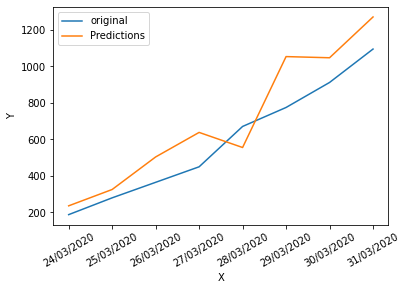

MAPE: 25.74
MSE : 24920.48


25.73893953536539

In [0]:
# Auto Regression: (COVID Deaths in March 2020)
# time series for the month of March (03/01/2020 to 03/31/2020)
# we will predict Confirmed Covid Cases
# for all Counties
# print("Auto Regression: (COVID Deaths in March 2020)")
ts_all_counties_march = get_time_series(counties_death, "all")[39:70]
train_all_counties_march, test_all_counties_march = get_test_train_split(ts_all_counties_march, split_ratio=0.75)
print("--------------------------- AR(3) -----------------------------")
ar3 = AR(3)
ar3.fit(train_all_counties_march)
ar3.predict(test_all_counties_march)

print("--------------------------- AR(5) -----------------------------")
ar3 = AR(5)
ar3.fit(train_all_counties_march)
ar3.predict(test_all_counties_march)

**Auto Regression: (COVID Deaths in April 2020)**

--------------------------- AR(3) -----------------------------
Date: 23/04/2020 - Test prediction: 14807.23 | Actual: 14537 Error:  1.86
Date: 24/04/2020 - Test prediction: 15208.80 | Actual: 14905 Error:  2.04
Date: 25/04/2020 - Test prediction: 15534.30 | Actual: 15482 Error:  0.34
Date: 26/04/2020 - Test prediction: 16065.74 | Actual: 15725 Error:  2.17
Date: 27/04/2020 - Test prediction: 16298.54 | Actual: 15992 Error:  1.92
Date: 28/04/2020 - Test prediction: 16518.60 | Actual: 16343 Error:  1.07
Date: 29/04/2020 - Test prediction: 16823.01 | Actual: 16556 Error:  1.61
Date: 30/04/2020 - Test prediction: 17012.14 | Actual: 16780 Error:  1.38


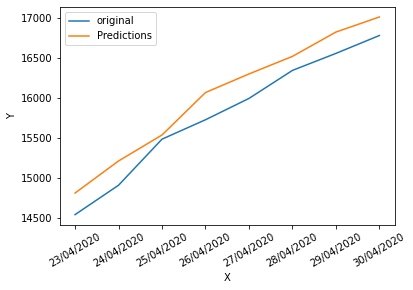

MAPE:  1.55
MSE : 66767.52
--------------------------- AR(5) -----------------------------
Date: 23/04/2020 - Test prediction: 14857.32 | Actual: 14537 Error:  2.20
Date: 24/04/2020 - Test prediction: 15364.22 | Actual: 14905 Error:  3.08
Date: 25/04/2020 - Test prediction: 15637.54 | Actual: 15482 Error:  1.00
Date: 26/04/2020 - Test prediction: 16151.31 | Actual: 15725 Error:  2.71
Date: 27/04/2020 - Test prediction: 16378.18 | Actual: 15992 Error:  2.41
Date: 28/04/2020 - Test prediction: 16559.82 | Actual: 16343 Error:  1.33
Date: 29/04/2020 - Test prediction: 16884.82 | Actual: 16556 Error:  1.99
Date: 30/04/2020 - Test prediction: 17066.34 | Actual: 16780 Error:  1.71


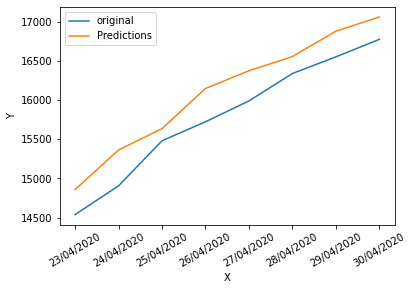

MAPE:  2.05
MSE : 113209.71
-------------------------------------------------------------------


In [0]:
# Auto Regression: (COVID Deaths in April 2020)
# time series for the month of April (04/01/2020 to 04/30/2020)
# we will predict 
# for all Counties
# print("Auto Regression: (COVID Deaths in April 2020)")
ts_all_counties_april = get_time_series(counties_death, "all")[70:100]
train_all_counties_april, test_all_counties_april = get_test_train_split(ts_all_counties_april, split_ratio=0.75)
print("--------------------------- AR(3) -----------------------------")
ar3 = AR(3)
ar3.fit(train_all_counties_april)
ar3.predict(test_all_counties_april)

print("--------------------------- AR(5) -----------------------------")
ar3 = AR(5)
ar3.fit(train_all_counties_april)
ar3.predict(test_all_counties_april)
print("-------------------------------------------------------------------")


# **Required Inference 2: Wald’s test, Z-test, and t-test** 
Apply the Wald’s test, Z-test, and t-test (assume all are applicable) to check whether the mean of COVID19 deaths and #cases are different from the second-last week to the last week in your dataset. Use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. Note, you have to report results for deaths and #cases separately, so think of this as two inferences. After running the test and reporting the numbers, check and comment on whether the tests are applicable or not. First use one-sample tests by computing the mean of the second-last week data and using that as guess for last week data. Then, repeat with a two-sample version of Wald and t-tests. For t-test, use both paired and unpaired tests. Use alpha value of 0.05 for all. For t-test, the threshold to check against is tn-1, alpha/2 for two-tailed, where n is the number of data points. You can find these values in online t tables, similar to z tables. 



In Hypothesis testing, we will apply the Wald’s test, Z-test, and t-test to check whether the mean of COVID19 deaths and number of confirmed new cases are different from the second-last week to the last week or not for the entire NYC region.

In [0]:
# Dropping last 5 rows of May Date
counties_death_T.drop(counties_death_T.tail(5).index,inplace=True)
counties_confirmed_T.drop(counties_confirmed_T.tail(5).index,inplace=True)

In [0]:
# Summing up for all counties to get deaths/cases for entire NYC
deaths_last_wk = np.sum(counties_death_T.tail(7), axis = 1).values
deaths_full = np.sum(counties_death_T, axis = 1).values
deaths_sec_last_wk = np.sum(counties_death_T[-14:-7], axis = 1).values

In [0]:
confirmed_last_wk = np.sum(counties_confirmed_T.tail(7), axis = 1).values
confirmed_full = np.sum(counties_confirmed_T, axis = 1).values
confirmed_sec_last_wk = np.sum(counties_confirmed_T[-14:-7], axis = 1).values

In [0]:
confirmed_last_wk

array([4618, 4640, 3145, 2231, 1849, 2503, 2637])

In [0]:
confirmed_sec_last_wk

array([4844, 4206, 3911, 2370, 2717, 3231, 3101])

In [0]:
deaths_sec_last_wk

array([442, 268, 109, 465, 516, 517, 442])

In [0]:
deaths_last_wk

array([368, 577, 243, 267, 351, 213, 224])

Checking whether the deaths/cases in the last week follow a normal distribution or not with the help of KS test. Checking normality helps in knowing the applicability of various tests in Hypothesis testing.

In [0]:
def plot(a, label, min_x = 0, max_x = 10):
    n = len(a)
    Srt = sorted(a)
    X = [min_x]
    Y = [0]
    cdf = [0.0]
    for i in range(0, n):
        X = X + [Srt[i], Srt[i]]
        Y = Y + [Y[len(Y)-1], Y[len(Y)-1]+(1/n)]
        cdf = cdf + [Y[len(Y)-1]]
    X = X + [max_x]
    Y = Y + [1.0]

    plt.plot(X,Y, label=label)
    plt.xlabel('x')
    plt.ylabel('Pr[X<=x]')
    plt.legend(loc='best')
    return cdf
    
def find_cdf_at(X, CDF, change_point):
    # First find the first element larger than the change_point
    index = -1
    for i, x in enumerate(X):
        if x >= change_point:
            index = i
            break
    # Return the CDF value at that point
    return CDF[index]

def k_s_test(X, Y, str1 = "", str2 = "", threshold = 0.05):
    X = sorted(X)
    Y = sorted(Y)
    
    x_min = min(X[0], Y[0]) - 5000
    x_max = max(X[len(X) - 1], Y[len(Y) - 1]) + 5000
    fig= plt.figure(figsize=(12,9))
    plt.grid(True)
    
    x_cdf = plot(X, str1, x_min, x_max)
    y_cdf = plot(Y, str2, x_min, x_max)      
    
    Fx = [find_cdf_at(X, x_cdf, change_point) for change_point in Y]
    Fy_minus = y_cdf[0:-1]
    Fy_plus = y_cdf[1:]

    max_val = 0
    max_index = 0
    left = True
    for i in range(0, len(Fx)):
        if abs(Fx[i] - Fy_minus[i]) > max_val:
            max_val = abs(Fx[i] - Fy_minus[i])
            max_index = i
            left = True
        if abs(Fx[i] - Fy_plus[i]) > max_val:
            max_val = abs(Fx[i] - Fy_plus[i])
            max_index = i
            left = False

    delta = -0.01
    ymin = 0
    ymax = 0
    if left == False:
        delta = delta * -1
        # Also need to find the limits for the vertical line
        ymin = min(Fy_plus[max_index], Fx[max_index])
    else:
        ymin = min(Fy_minus[max_index], Fx[max_index])
    
    print("Max value is {0} at X={1}".format(max_val, Y[max_index]))
    if max_val > threshold:
        print("D > C, Reject Null Hypothesis")

    # plt.axvline(x=Y[max_index], ymax=ymin+max_val, ymin = ymin)
    plt.plot([Y[max_index],Y[max_index]],[ymin,ymin+max_val])
    annotation_str = "Max Diff=" + str(round(max_val,2))
    plt.annotate(annotation_str, xy = [Y[max_index], ymin+max_val/2])

    return 


Max value is 0.35000000000000014 at X=208.87284204026932
D > C, Reject Null Hypothesis


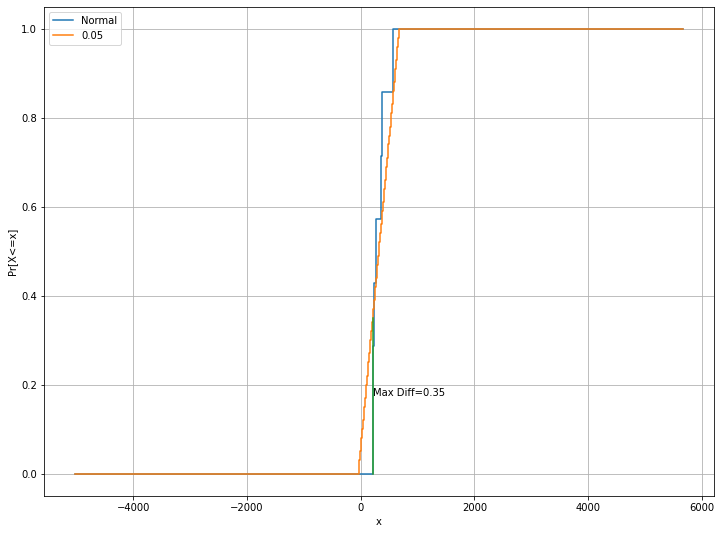

In [0]:
import matplotlib.pyplot as plt
mean = np.mean(deaths_last_wk)
sigma = np.std(deaths_last_wk)
# Now we check if distribution of deaths in last week follow a normal distribution
k_s_test(deaths_last_wk, np.linspace(mean - 3*sigma, mean + 3*sigma, 100), "Normal", 0.05) 

Max value is 0.3000000000000001 at X=1797.1482923417402
D > C, Reject Null Hypothesis


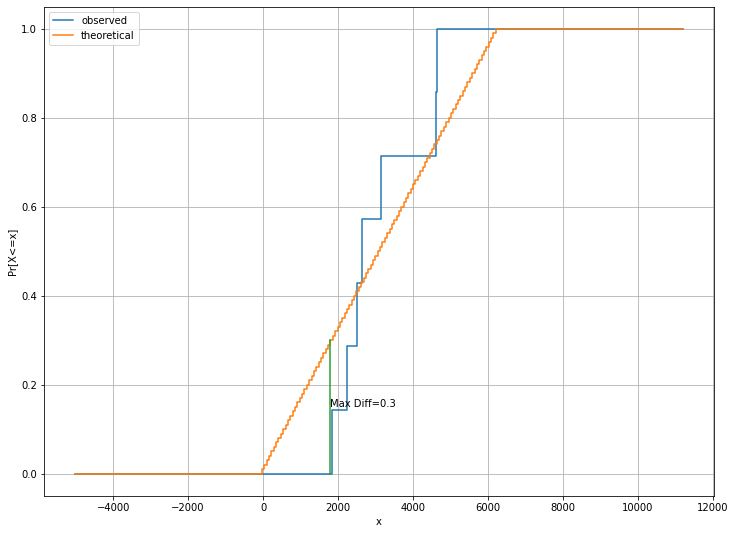

In [0]:
mean = np.mean(confirmed_last_wk)
sigma = np.std(confirmed_last_wk)
k_s_test(confirmed_last_wk, np.linspace(mean - 3*sigma, mean + 3*sigma, 100), "observed", "theoretical" , 0.05)

As seen above, both the distributions of deaths and cases fail to pass the hypothesis of normality at alpha level of 0.05.

For all the tests below, we set the following hypothesis

Null Hypothesis H0: Mean number of deaths/cases in last week is equal to mean number of deaths/cases in second last week

Alternative Hypothesis H1: Mean number of deaths/cases in last week is not equal to mean number of deaths/cases in second last week

**One sample Wald's Test**

In [0]:
def walds_one_sample(last_wk_data, sec_last_wk_data, category):

  # Computing the test statistic W = (theta_hat - guess) / se_hat(theta_hat) = (theta_hat - guess) / (root(lambda_MLE / n))
  guess = np.mean(sec_last_wk_data)
  x_bar = np.mean(last_wk_data)
  n = len(last_wk_data)
  theta_hat = x_bar   # Since for Poisson-distributed data, MLE estimator is lamda_hat which is equal to sample mean
  num = (theta_hat - guess)
  den = np.sqrt(x_bar / float(n))
  w_stats = num / den  
  print("w statistic = " + str(abs(w_stats)))

  # Comparing our statistic with threshold of z_alpha/2 where alpha = 0.05
  if abs(w_stats) > 1.962:
    print("Reject the Null Hypothesis. Hence mean number of "+ category +" in last week is not equal to " + str(guess))
  else:
    print("Accept the Null Hypothesis. Hence mean number of "+ category +" in last week is equal to " + str(guess))

In [0]:
walds_one_sample(deaths_last_wk, deaths_sec_last_wk, "deaths")

w statistic = 10.895196436712872
Reject the Null Hypothesis. Hence mean number of deaths in last week is not equal to 394.14285714285717


In [0]:
walds_one_sample(confirmed_last_wk, confirmed_sec_last_wk, "confirmed cases")

w statistic = 18.749029480501456
Reject the Null Hypothesis. Hence mean number of confirmed cases in last week is not equal to 3482.8571428571427


With the same reason cited above for one-sample Wald's test (mu_x and mu_y not being asymptotically normal), two-sample test is **not applicable**. Even here the w-statistic observed is quite high since both deaths and confirmed cases sample data do not follow the normal distribution. Thus we cannot conclude mean number of deaths/confirmed cases in last week is not equal to the mean number of deaths/confirmed cases in second last week

The values of w statistic is quite high because the data does not even follow the normal distribution as seen above from the KS test.

**One sample Z-Test**

In [0]:
def z_one_sample(last_wk_data, sec_last_wk_data, full_data):

  # Computing the z statistic z = (x_bar - guess) / (true_std_dev / root(n))
  guess = np.mean(sec_last_wk_data)
  x_bar = np.mean(last_wk_data)
  true_var = np.std(full_data)
  num = (x_bar - guess)
  den = true_var / np.sqrt(len(last_wk_data))
  z_stats = num / den
  print("z statistic = " + str(abs(z_stats)))

  # Comparing the z statistic with threshold of z_alpha/2 where alpha = 0.05
  if abs(z_stats) > 1.962:
    print("Reject the Null Hypothesis")
  else:
    print("Accept the Null Hypothesis")

In [0]:
z_one_sample(deaths_last_wk, deaths_sec_last_wk, deaths_full)

z statistic = 1.0193528209681992
Accept the Null Hypothesis


In [0]:
z_one_sample(confirmed_last_wk, confirmed_sec_last_wk, confirmed_full)

z statistic = 0.5173811066893153
Accept the Null Hypothesis


The Z-test for both number of deaths and cases is **not applicable**. <br>
This is because the z-test requires the true standard deviation of the entire population be known beforehand. However, we only have samples of data. Even the sample size is too small.

So though the test accepts the null hypothesis meaning that the mean number of deaths in last week is equal to mean number of deaths in second last week, since the test is not applicable, we cannot make that conclusion.

**One sample T Test**

In [0]:
def t_one_sample(last_wk_data, sec_last_wk_data):

  # Computing t statistic = (x_bar - guess) / (sample_var / root(n))
  guess = np.mean(sec_last_wk_data)
  x_bar = np.mean(last_wk_data)
  sample_var = np.std(last_wk_data)
  # sample_var = np.sqrt(np.sum(np.square(last_wk_data - np.mean(last_wk_data))) / len(last_wk_data))
  num = x_bar - guess
  den = sample_var / np.sqrt(len(last_wk_data))
  t_stats = num / den
  print("t statistic = " + str(abs(t_stats)))

  # Comparing our statistic with critical value
  # Critical value for n=6, alpha=0.05 is 2.447
  if abs(t_stats) > 2.447:
    print("Reject the Null Hypothesis")
  else:
    print("Accept the Null Hypothesis")

In [0]:
t_one_sample(deaths_last_wk, deaths_sec_last_wk)

t statistic = 1.6423153628609173
Accept the Null Hypothesis


In [0]:
t_one_sample(confirmed_last_wk, confirmed_sec_last_wk)

t statistic = 1.002178310411489
Accept the Null Hypothesis


The T-test for both number of deaths and cases is again **not applicable**. <br>
This is because though t-test is applicable on data with small sample sizes, the data should be normally distributed. However, as we saw above, the sample data for both deaths and cases is not normally distributed and so not applicable.

Again here since the test accepts the null hypothesis meaning that the mean number of deaths in last week is equal to mean number of deaths in second last week, since the test is not applicable, we cannot make that conclusion.

**Two Sample Wald's Test**

In [0]:
def walds_two_sample(last_wk_data, sec_last_wk_data, category):

  # Computing w statistic
  mu_y = np.mean(sec_last_wk_data)
  mu_x = np.mean(last_wk_data)
  std_error = np.sqrt((mu_x / len(last_wk_data)) + (mu_y / len(sec_last_wk_data))) # Using mu_x for poisson distribution
  num = mu_x - mu_y
  w_stats_two_sample = num / std_error

  # Comparing our statistic with threshold of z_alpha/2 where alpha = 0.05
  print("w statistic for 2 sample = " + str(abs(w_stats_two_sample)))
  if abs(w_stats_two_sample) > 1.962:
    print("Reject the Null Hypothesis. Hence mean number of "+ category + " in last week is not equal to the mean number of "+ category + " in second last week")
  else:
    print("Accept the Null Hypothesis. Hence mean number of "+ category + " in last week is equal to the mean number of "+ category + " in second last week")

In [0]:
walds_two_sample(deaths_last_wk, deaths_sec_last_wk, "deaths")

w statistic for 2 sample = 7.295882951143425
Reject the Null Hypothesis. Hence mean number of deaths in last week is not equal to the mean number of deaths in second last week


In [0]:
walds_two_sample(confirmed_last_wk, confirmed_sec_last_wk, "confirmed cases")

w statistic for 2 sample = 12.85415963104731
Reject the Null Hypothesis. Hence mean number of confirmed cases in last week is not equal to the mean number of confirmed cases in second last week


With the same reason cited for one-sample Wald's test, two-sample test is **not applicable**. Even here the w-statistic observed is quite high since both deaths and confirmed cases sample data do not follow the normal distribution. Thus we cannot conclude mean number of deaths/confirmed cases in last week is not equal to the mean number of deaths/confirmed cases in second last week

**Two Sample Paired T Test**

In [0]:
def paired_t_test_two_sample(last_wk_data, sec_last_wk_data):

  # Computing the paired t-statistic
  y_bar = np.mean(sec_last_wk_data)
  x_bar = np.mean(last_wk_data)

  # Since for paired t test, we assume samples are dependent, subtracting
  # the array values of last week to second last week data.
  d = last_wk_data - sec_last_wk_data
  d_bar = x_bar - y_bar
  sample_std_dev = np.std(d)
  den = sample_std_dev / np.sqrt(len(d))
  t_stats_paired = d_bar / den
  print("t statistic = " + str(abs(t_stats_paired)))

  # Comparing our statistic with critical value
  # Critical value for n=6, alpha=0.05 is 2.447
  if abs(t_stats_paired) > 2.447:
    print("Reject the Null Hypothesis.")
  else:
    print("Accept the Null Hypothesis.")

In [0]:
paired_t_test_two_sample(deaths_last_wk, deaths_sec_last_wk)

t statistic = 0.9627713070547247
Accept the Null Hypothesis.


In [0]:
paired_t_test_two_sample(confirmed_last_wk, confirmed_sec_last_wk)

t statistic = 2.457741691337603
Reject the Null Hypothesis.


For checking the applicability of the paired t-test, we need to check if the difference array, D follows a normal distribution or not

Max value is 0.3100000000000001 at X=-313.11652592796605
D > C, Reject Null Hypothesis


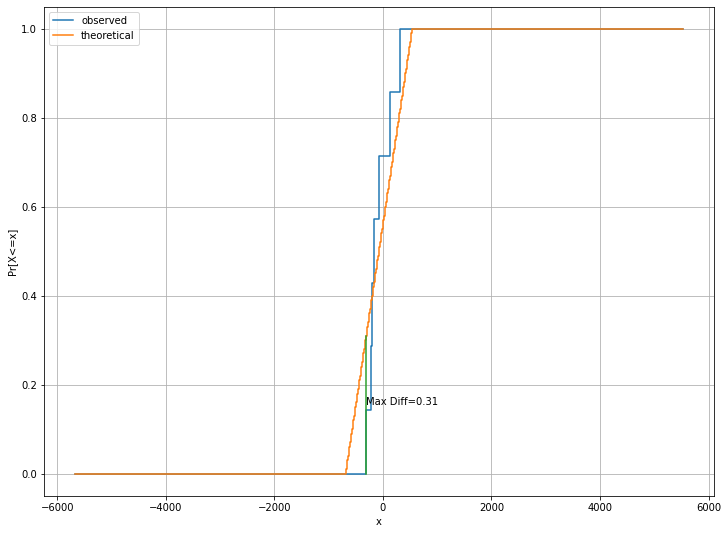

In [0]:
# Checking for deaths data first
d = deaths_last_wk - deaths_sec_last_wk
mean = np.mean(d)
sigma = np.std(d)
k_s_test(d, np.linspace(mean - 3*sigma, mean + 3*sigma, 100), "observed", "theoretical" , 0.05)

Max value is 0.3200000000000001 at X=-869.2353776825155
D > C, Reject Null Hypothesis


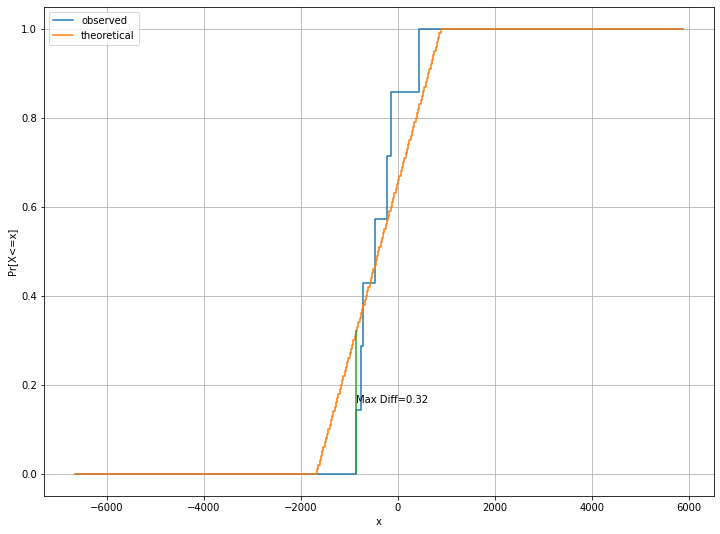

In [0]:
# Checking for confirmed cases
d = confirmed_last_wk - confirmed_sec_last_wk
mean = np.mean(d)
sigma = np.std(d)
k_s_test(d, np.linspace(mean - 3*sigma, mean + 3*sigma, 100), "observed", "theoretical" , 0.05)

For both deaths and confirmed cases data, we observe that the difference array does not follow the normal distribution, hence the paired t-test too is **not applicable**.

Hence we cannot conclude that means of last and second-last week data for deaths are equal and for confirmed cases, not equal.

**Two Sample Unpaired T-Test**

In [0]:
def unpaired_t_test_two_sample(last_wk_data, sec_last_wk_data):
  
  # Computing the unpaired t-statistic
  y_bar = np.mean(sec_last_wk_data)
  x_bar = np.mean(last_wk_data)
  d_bar = x_bar - y_bar
  # For unpaired t-test, we use the pooled standard deviation
  sample_std_dev = np.sqrt(np.var(last_wk_data) / len(last_wk_data) + np.var(sec_last_wk_data) / len(sec_last_wk_data))
  t_stats_unpaired = d_bar / sample_std_dev
  print("t statistic = " + str(abs(t_stats_unpaired)))

  # Comparing with the critical value
  # Critical value for n+m-2=12, alpha=0.05 is 2.179
  if abs(t_stats_unpaired) > 2.179:
    print("Reject the Null Hypothesis.")
  else:
    print("Accept the Null Hypothesis.")

In [0]:
unpaired_t_test_two_sample(deaths_last_wk, deaths_sec_last_wk)

t statistic = 1.063344539978276
Accept the Null Hypothesis.


In [0]:
unpaired_t_test_two_sample(confirmed_last_wk, confirmed_sec_last_wk)

t statistic = 0.7905840267048437
Accept the Null Hypothesis.


To check the applicabilty of Unpaired T-Test we need to check if the distributions of both the weeks data follow a normal distribution.

We already know that for deaths and cases of last week do not follow a normal distribution. Hence we now check for second last weeks data.

Max value is 0.3499999999999994 at X=525.4483265290814
D > C, Reject Null Hypothesis


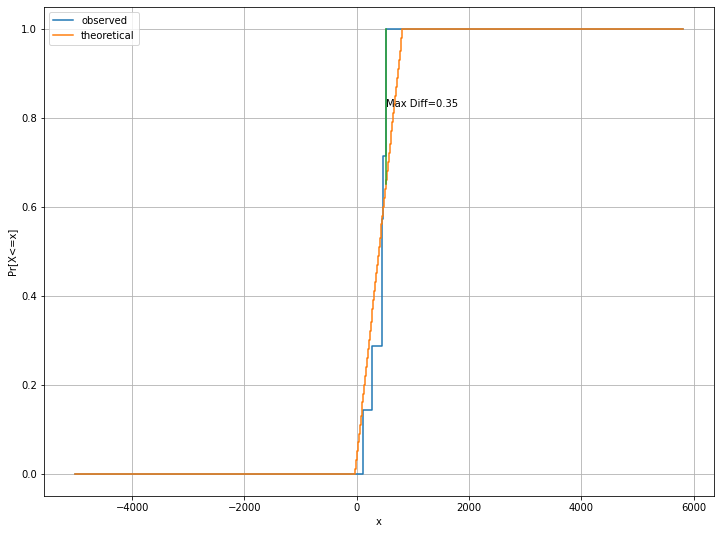

In [0]:
# Checking for deaths data first
d = deaths_sec_last_wk
mean = np.mean(d)
sigma = np.std(d)
k_s_test(d, np.linspace(mean - 3*sigma, mean + 3*sigma, 100), "observed", "theoretical" , 0.05)

Max value is 0.3000000000000001 at X=1797.1482923417402
D > C, Reject Null Hypothesis


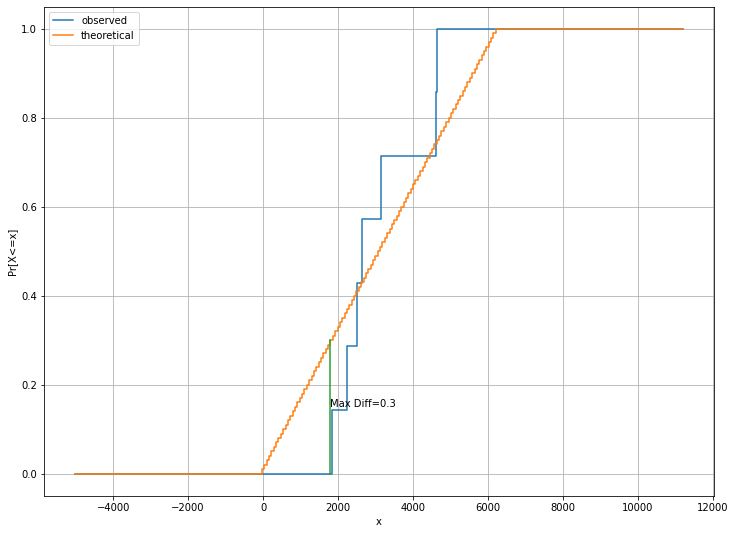

In [0]:
# Checking for confirmed cases
d = confirmed_last_wk
mean = np.mean(d)
sigma = np.std(d)
k_s_test(d, np.linspace(mean - 3*sigma, mean + 3*sigma, 100), "observed", "theoretical" , 0.05)

Both the distributions of second last week do not a normal distribution. Hence the test is **not applicable** for both deaths and cases and we cannot surely say that the means of deaths/cases for both weeks is the same. (Both tests got accepted). 

# **Required Inference 3:**
Repeat inference 2 above but for equality of distributions (distribution of second-last week and last week), using K-S test and Permutation test. For the K-S test, use both 1-sample and 2-sample tests. For the 1-sample test, try Poisson, Geometric, and Binomial. To obtain parameters of these distributions to check against in 1-sample KS, use MME on second last week’s data to obtain parameters of the distribution, and then check whether the last week’s data has the distribution with the obtained MME parameters. Use a threshold of 0.05 for both K-S test and Permutation test.

**Permutation Test**

In [0]:
# PERMUTATION TEST: INFERENCE 3b
def permutation_test(X, Y, n=5000, threshold=0.05):
    T_obs = abs(np.mean(X) - np.mean(Y)) 
    xy = np.append(X,Y)
    p_value = 0.0
    for i in range(n):
        permutation = np.random.permutation(xy)
        X1 = permutation[:len(X)]
        Y1 = permutation[len(X):]
        Ti = abs(np.mean(X1) - np.mean(Y1))
#         print(Ti, T_obs)
        if(Ti > T_obs):
            p_value += 1.0
    
#     p_value = p_value/float(np.math.factorial(n))
    p_value = p_value/n
    print("The p-value is: ", p_value)
    if(p_value <= threshold):
        print("==> Reject the Null Hypothesis")
    else:
        print("==> Accept the Null Hypothesis")
    return

**PERMUTATION TEST: Hypotheses and Results**

In [0]:
# PERMUTATION TEST: Hypotheses and Results
ts_all_counties_deaths = get_time_series(counties_death, "all")['count']
ts_all_counties_cases = get_time_series(counties_confirmed, "all")['count']
# ts_all_counties_cases = np.sqrt(get_time_series(counties_confirmed, "all")['count'])
x_df = collision_after_covid
x_df['date'] = x_df.index
x_df = x_df[['date','NUMBER OF PERSONS INJURED']]
x_df = x_df.reset_index(drop=True)
x_df['date'] = x_df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))
x = np.array(x_df['NUMBER OF PERSONS INJURED'])
# print("--- PERMUTATION TEST ---")
print("-----------------------------------------------------------------------------------------------------")
print("H0: For MARCH'20, the distribution of #deaths due to COVID and #injuries due to collisions is same.")
permutation_test(ts_all_counties_deaths[70:101],x[70:101])
print("-----------------------------------------------------------------------------------------------------")
print("H0: For MARCH'20, the distribution of #confirmed COVID cases and #injuries due to collisions is same.")
permutation_test(ts_all_counties_cases[70:101],x[70:101])
print("-----------------------------------------------------------------------------------------------------")
print("H0: For APRIL'20, the distribution of #deaths due to COVID cases and #injuries due to collisions is same.")
permutation_test(ts_all_counties_deaths[39:70],x[39:70])
print("-----------------------------------------------------------------------------------------------------")
print("H0: For APRIL'20, the distribution of #confirmed COVID cases and #injuries due to collisions is same.")
permutation_test(ts_all_counties_cases[39:70],x[39:70])
print("-----------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------
H0: For MARCH'20, the distribution of #deaths due to COVID and #injuries due to collisions is same.
The p-value is:  0.0
==> Reject the Null Hypothesis
-----------------------------------------------------------------------------------------------------
H0: For MARCH'20, the distribution of #confirmed COVID cases and #injuries due to collisions is same.
The p-value is:  0.0
==> Reject the Null Hypothesis
-----------------------------------------------------------------------------------------------------
H0: For APRIL'20, the distribution of #deaths due to COVID cases and #injuries due to collisions is same.
The p-value is:  0.3068
==> Accept the Null Hypothesis
-----------------------------------------------------------------------------------------------------
H0: For APRIL'20, the distribution of #confirmed COVID cases and #injuries due to collisions is same.
The p-value is:  0.0
==

# **Required Inference 3**:

In [0]:
def plot(a, label, min_x = 0, max_x = 10):
    n = len(a)
    Srt = sorted(a)
    X = [min_x]
    Y = [0]
    cdf = [0.0]
    for i in range(0, n):
        X = X + [Srt[i], Srt[i]]
        Y = Y + [Y[len(Y)-1], Y[len(Y)-1]+(1/n)]
        cdf = cdf + [Y[len(Y)-1]]
    X = X + [max_x]
    Y = Y + [1.0]

    plt.plot(X,Y, label=label)
    plt.xlabel('x')
    plt.ylabel('Pr[X<=x]')
    plt.legend(loc='best')
    return cdf

def get_cdf(X):
    Fx = [0]
    for i in range(0, len(X_cases)):
        Fx = Fx + [Fx[len(Fx)-1] + 1/len(X_cases)]
    return Fx

def find_cdf_at(X, CDF, change_point):
    # First find the first element larger than the change_point
    index = -1
    for i, x in enumerate(X):
        if x >= change_point:
            index = i
            break
    # Return the CDF value at that point
    return CDF[index]

def ks_test_2_sample(X, Y, week, ho, threshold = 0.05):
    X = sorted(X)
    Y = sorted(Y)
    
    x_min = min(X[0], Y[0]) - 5000
    x_max = max(X[len(X) - 1], Y[len(Y) - 1]) + 5000
    fig= plt.figure(figsize=(12,9))
    plt.grid(True)
    
    x_cdf = plot(X, 'week ' + str(week), x_min, x_max)
    y_cdf = plot(Y, 'week ' + str(week+1), x_min, x_max)      
    
    Fx = [find_cdf_at(X, x_cdf, change_point) for change_point in Y]
    Fy_minus = y_cdf[0:-1]
    Fy_plus = y_cdf[1:]

    max_val = 0
    max_index = 0
    left = True
    for i in range(0, len(Fx)):
        if abs(Fx[i] - Fy_minus[i]) > max_val:
            max_val = abs(Fx[i] - Fy_minus[i])
            max_index = i
            left = True
        if abs(Fx[i] - Fy_plus[i]) > max_val:
            max_val = abs(Fx[i] - Fy_plus[i])
            max_index = i
            left = False

    delta = -0.01
    ymin = 0
    ymax = 0
    if left == False:
        delta = delta * -1
        # Also need to find the limits for the vertical line
        ymin = min(Fy_plus[max_index], Fx[max_index])
    else:
        ymin = min(Fy_minus[max_index], Fx[max_index])
    
    if max_val > threshold:
        print("D > C, We reject Ho:", ho)

    # plt.axvline(x=Y[max_index], ymax=ymin+max_val, ymin = ymin)
    plt.plot([Y[max_index],Y[max_index]],[ymin,ymin+max_val])
    annotation_str = "Max Diff=" , max_val
    plt.annotate(annotation_str, xy = [Y[max_index], ymin+max_val/2])

    return 


In [0]:
def ks_test_1_sample(Fx, Fy, ho, threshold = 0.05):
    Fx_minus = Fx[0:-1]
    Fx_plus = Fx[1:]
    max_val = 0
    for i in range(0, len(Fy)):
        if abs(Fy[i] - Fx_minus[i]) > max_val:
            max_val = abs(Fy[i] - Fx_minus[i])
        if abs(Fy[i] - Fx_plus[i]) > max_val:
            max_val = abs(Fy[i] - Fx_plus[i])

    if max_val > threshold:
        print("Max value = {0} > C, We reject Ho: {1}".format(max_val, ho))

    return 

In [0]:
# Get last two weeks data
two_weeks_confirmed = counties_confirmed[counties_confirmed.columns[-14:]].sum(axis=0).to_numpy()
two_weeks_death = counties_death[counties_death.columns[-14:]].sum(axis=0).to_numpy()

### 2 Sample KS Test

D > C, We reject Ho: The distribution of cases in second last and last week are same
D > C, We reject Ho: The distribution of deaths in second last and last week are same


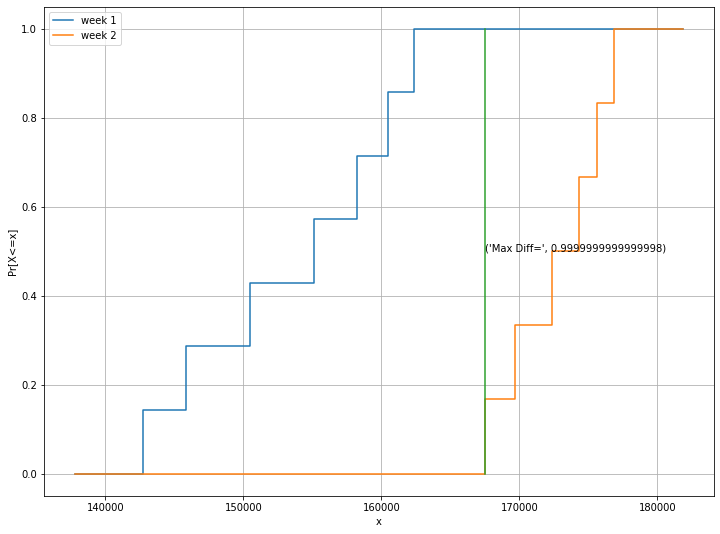

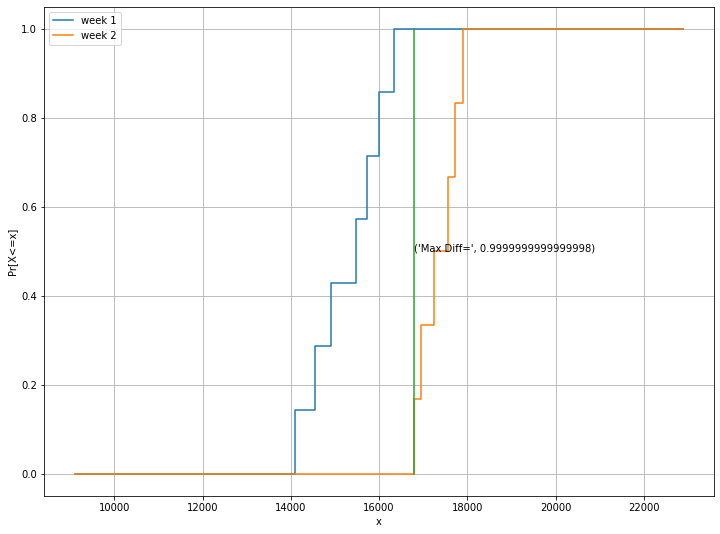

In [0]:
ks_test_2_sample(two_weeks_confirmed[0:7], two_weeks_confirmed[8:], 1, "The distribution of cases in second last and last week are same")
ks_test_2_sample(two_weeks_death[0:7], two_weeks_death[8:], 1, "The distribution of deaths in second last and last week are same")

### 1 Sample KS Test with Poisson, Geometric, Binomial distribution

In [0]:
X_cases = sorted(two_weeks_confirmed[7:])
X_deaths = sorted(two_weeks_death[7:])
Fx_cases = get_cdf(X_cases)
Fx_deaths = get_cdf(X_deaths)

# First lets sample mean for the second last week
X_bar_cases = np.mean(two_weeks_confirmed[0:7])
X_bar_deaths = np.mean(two_weeks_death[0:7])

#### Poisson Distribution

In [0]:
# First get all the cdf values for Poisson distribution
Fy_cases = [poisson.cdf(change_point, X_bar_cases) for change_point in X_cases]
Fy_deaths = [poisson.cdf(change_point, X_bar_deaths) for change_point in X_deaths]
ks_test_1_sample(Fx_cases, Fy_cases, "The cases in last week follow Poission distribution")
ks_test_1_sample(Fx_cases, Fy_deaths, "The deaths in last week follow Poission distribution")

NameError: ignored

#### Binomial distribution

n_mme = (X_bar)^2/(X_bar - S)

p_mme = 1 - S/X_bar

X_bar is the sample mean, S is the sample variance

In [0]:
# First perform the experiment for number of new cases
S_cases = np.var(two_weeks_confirmed[0:7])

n_binom_mme = X_bar_cases*X_bar_cases/(X_bar_cases - S_cases)
p_binom_mme = 1 - S_cases/X_bar_cases

Fy_cases = [binom.cdf(change_point, n_binom_mme, p_binom_mme) for change_point in X_cases]
ks_test_1_sample(Fx_cases, Fy_cases, "The cases in last week follow Binomial distribution")

# Now, perform the same experiment for the number of deaths
S_deaths = np.var(two_weeks_death[0:7])

n_binom_mme = X_bar_deaths*X_bar_deaths/(X_bar_deaths - S_deaths)
p_binom_mme = 1 - S_deaths/X_bar_deaths

Fy_deaths = [binom.cdf(change_point, n_binom_mme, p_binom_mme) for change_point in X_deaths]
ks_test_1_sample(Fx_deaths, Fy_deaths, "The deaths in last week follow Binomial distrubtion")

NameError: ignored

#### Geometric Distribution

p_mme = 1/X_bar

In [0]:
# First perform the experiment for number of new cases
p_geom_mme = 1/X_bar_cases
Fy_cases = [geom.cdf(change_point, p_geom_mme) for change_point in X_cases]
ks_test_1_sample(Fx_cases, Fy_cases, "The cases in last week follow Geometric distribution")

# Now, perform the same experiment for the number of deathsp_geom_mme = 1/X_bar_cases
Fy_deaths = [geom.cdf(change_point, p_geom_mme) for change_point in X_deaths]
ks_test_1_sample(Fx_deaths, Fy_deaths, "The deaths in last week follow Geometric distribution")

# **Required Inference 4:**

Report the Pearson correlation value for #deaths and your X dataset, and also for #cases and your X dataset over one month of data. Use the most relevant column in X to compare against the covid numbers.

# **Person Correlation Coefficient**

In [0]:
# INFERENCE 4
# Parameters
#  ----------
#  x : 1D array
#  y : 1D array the same length as x
def plot_corr(plot_x, x, c,label):
    c = np.sqrt(c)
    fig3, axis = plt.subplots(1, figsize=(13,6))
    axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.plot(plot_x,x,label="X (Number of Injured People due to Collisions)")
    plt.plot(plot_x,c,label=label)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    plt.xticks(rotation=30)
    plt.show()
    
def person_correlation_coefficient(x, y):
    covariance_matrix = np.cov(x,y)
    r = covariance_matrix[0][1]/np.sqrt((covariance_matrix[0][0]*covariance_matrix[1][1]))
    print("Pearson Correlation Coefficient Value is: " + "{:5.2f}".format(r))
    return r

**PEARSON CORRELATION COEFFICIENT FOR CONFIRMED CASES v/s X (March and April)**


In [0]:
# PEARSON CORRELATION COEFFICIENT FOR CASES vs X (March and April)
ts_all_counties_cases = get_time_series(counties_confirmed, "all")

x_df = collision_after_covid
x_df['date'] = x_df.index
x_df = x_df[['date','NUMBER OF PERSONS INJURED']]
x_df = x_df.reset_index(drop=True)
x_df['date'] = x_df.date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))

c_df = ts_all_counties_cases['count']

print("-----------------------------------------------------------------------------------------------------")
print("Number of persons injured in motor vehicle crashes vs Number of confirmed COVID-19 cases (in MARCH'20)")
person_correlation_coefficient(np.array(x_df[39:70]['NUMBER OF PERSONS INJURED']), c_df[39:70])
print("The curve below is plotted against the square root of # confirmed COVID cases for scaling:")
plot_corr(x_df[39:70]['date'],np.array(x_df[39:70]['NUMBER OF PERSONS INJURED']), c_df[39:70],"COVID : sqrt(confirmed cases)")
print("This value shows a strong negative correlation suggesting that more and more people stayed indoors due to the enforcement of social distancing. Hence, less traffic and fewer accidents.")
print("-----------------------------------------------------------------------------------------------------")
# person_correlation_coefficient(np.array(df[70:100]['NUMBER OF PERSONS INJURED']), np.array(ts_all_counties_cases[70:100]['count']))

print("Number of persons injured in motor vehicle crashes vs Number of confirmed COVID-19 cases (in APRIL'20)")
person_correlation_coefficient(np.array(x_df[39:70]['NUMBER OF PERSONS INJURED']), c_df[70:101])
print("The curve below is plotted against the square root of # confirmed COVID cases for scaling:")
plot_corr(x_df[70:101]['date'],np.array(x_df[39:70]['NUMBER OF PERSONS INJURED']), c_df[70:101],"COVID : sqrt(confirmed cases)")
print("This value shows a strong negative correlation suggesting that more and more people stayed indoors due to the enforcement of social distancing. Hence, less traffic and fewer accidents.")
print("-----------------------------------------------------------------------------------------------------")

# person_correlation_coefficient(np.array([-2.1, -1,  4.3]), np.array([3,  1.1,  0.12]))

PEARSON CORRELATION COEFFICIENT FOR NUMBER OF DEATHS DUE TO COVID v/s X (March and April)


In [0]:
# PEARSON CORRELATION COEFFICIENT FOR DEATHS vs X (March and April)
ts_all_counties_deaths = get_time_series(counties_death, "all")
d_df = ts_all_counties_deaths['count']

print("-----------------------------------------------------------------------------------------------------")
print("Number of persons injured in motor vehicle crashes vs Number of confirmed COVID-19 cases (in MARCH'20)")
person_correlation_coefficient(np.array(x_df[39:70]['NUMBER OF PERSONS INJURED']), d_df[39:70])
print("The curve below is plotted against the square root of # confirmed COVID cases for scaling:")
plot_corr(x_df[39:70]['date'],np.array(x_df[39:70]['NUMBER OF PERSONS INJURED']), d_df[39:70], "COVID: sqrt(#deaths)")
print("This value shows a strong negative correlation suggesting that more and more people stayed indoors due to the enforcement of social distancing. Hence, less traffic and fewer accidents.")
print("-----------------------------------------------------------------------------------------------------")
# person_correlation_coefficient(np.array(df[70:100]['NUMBER OF PERSONS INJURED']), np.array(ts_all_counties_cases[70:100]['count']))

print("Number of persons injured in motor vehicle crashes vs Number of confirmed COVID-19 cases (in APRIL'20)")
person_correlation_coefficient(np.array(x_df[39:70]['NUMBER OF PERSONS INJURED']), d_df[70:101])
print("The curve below is plotted against the square root of # confirmed COVID cases for scaling:")
plot_corr(x_df[70:101]['date'],np.array(x_df[39:70]['NUMBER OF PERSONS INJURED']), d_df[70:101], "COVID: sqrt(#deaths)")
print("(VERY STONG NEGATIVE CORRELATION) This value shows a strong negative correlation suggesting that more and more people stayed indoors as the COVID situation in NYC worsened through April. Hence, fewer vehicles on the road led to less traffic and fewer accidents.")
print("-----------------------------------------------------------------------------------------------------")

# person_correlation_coefficient(np.array([-2.1, -1,  4.3]), np.array([3,  1.1,  0.12]))

# **Inference: Bayesian Inference**

In [0]:
from scipy import stats

def computePosterior(deaths):
  lambdas = []
  #lambda mme is the mean of first week
  lambda_mme = deaths[:7].mean()
  
  for i in range(0, len(deaths), 7):
    #updating parameters per week for the gamma distribution
    alpha = np.sum(deaths[:i+7])+1
    beta = i+7 + (1/lambda_mme)
    lambdas.append([alpha, beta])

  x = np.linspace(0, 1000, 100)

  for i  in range(4):
    y = stats.gamma.pdf(x, lambdas[i][0], scale = 1/lambdas[i][1])
    #calculating the MAP
    lambdaMAP = deaths[:i+7].sum() / (7 + 1/lambdas[i][1])
    print("Week: ", i+1)
    print("Posterior parameters: alpha: ", lambdas[i][0], " beta: ", lambdas[i][1])
    print("MAP: ", lambdaMAP)
    plt.plot(x, y, label = "Week: " + str(i+1))

  plt.legend()
  plt.show()

In [0]:
computePosterior(aggregated_death.iloc[70:100].values)

From the graph above, we see that max number of deaths occur in week 2 followed week 4 for the month of April.

#**Inference : Chi-square Independence Test**

In the Chi-square test we will check whether the covid 19 affects the motor vehicle collision. <br> 
In this check of whether the 2 sets ( X = **Covid19 Dataset**, Y = **Motor Vehicle Collision** ) are **independent**. <br> 
Our **null hypothesis** is that **X dependent on Y** <br> 
It makes more sense to have X dependent on Y as we know that due to Covid19 there are lot of lockdowns and traffic has gone down. It will eventually lead to lesser accidents. We will calculate chi-square value to find the same. <br>

If **p-value > alpha**, we will reject the **null hypothesis**.

Note that our null hypothesis is unusual in this case as this is the expected default behaviour. <br> 
We are assuming **alpha** to be **0.05**. <br>

We will have 2 rows and 2 columns, the columns will be **Before Covid and After Covid** while the rows will be **Injured Cases and Death Cases**. 

In [0]:
def chi_square(matrix_covid_vehicle):
    rows = matrix_covid_vehicle.shape[0]
    cols = matrix_covid_vehicle.shape[1]
    
    df = (rows-1)*(cols-1)
    
    total_row1,total_row2 = np.sum(matrix_covid_vehicle,axis=0)
    total_col1,total_col2 = np.sum(matrix_covid_vehicle,axis=1)
    
    total = total_row1+total_row2 
    
    expected_values = np.zeros([2,2])
    expected_values[0][0] = (float(total_col1)*total_row1)/(total)
    expected_values[0][1] = (float(total_col2)*total_row1)/(total)
    expected_values[1][0] = (float(total_col1)*total_row2)/(total)
    expected_values[1][1] = (float(total_col2)*total_row2)/(total)
    
    q_expected = 0.0
    for i in range(rows):
        for j in range(cols):
            q_expected = q_expected + ((expected_values[i][j] - matrix_covid_vehicle[i][j])**2)/float(expected_values[i][j])
    return (q_expected,df)

In [0]:
matrix_covid_vehicle = np.zeros([2,2],int)
matrix_covid_vehicle[0][0] = collision_before_covid['NUMBER OF PERSONS INJURED'].sum()
matrix_covid_vehicle[0][1] = collision_after_covid['NUMBER OF PERSONS INJURED'].sum()
matrix_covid_vehicle[1][0] = collision_before_covid['NUMBER OF PERSONS KILLED'].sum()
matrix_covid_vehicle[1][1] = collision_after_covid['NUMBER OF PERSONS KILLED'].sum()

q_observed,df = chi_square(matrix_covid_vehicle)

In [0]:
q_observed,df

Given, alpha = 0.05 <br>
Since Q statistic is really large, from the table we find out that the p-value will be really small.  <br>
**p-value <<< alpha** <br>

Hence, X is dependent on Y.


#**Inference : Chi-square Independence Test**

In the previous Chi-square test we saw that the covid 19 affects the motor vehicle collision. <br>
In this inference, we want to see if the collision of pedestrians have gone down or remain the same since there were lesser number of pedestrians on the road in the time of lockdown compared to the number of vehicles on the road. To check this, we will see the ratio of pedestrian injured cases to the total injured cases and the ratio of pedestrian death cases before and after Covid19.
In this check of whether the 2 sets ( X = **Covid19 Dataset**, Y = **Pedestrian Cases** ) are **independent**. <br> 
Our **null hypothesis** is that **X is independent of Y** <br> 

If **p-value <= alpha**, we will reject the null hypothesis.

We are assuming **alpha** to be **0.05**. <br>

We will have 2 rows and 2 columns, the columns will be **Before Covid and After Covid** while the rows will be **Pedestrian Injured Cases and Death Cases**. 

In [0]:
matrix_covid_pedestrian = np.zeros([2,2])
matrix_covid_pedestrian[0][0] = collision_before_covid['NUMBER OF PEDESTRIANS INJURED'].sum()/collision_before_covid['NUMBER OF PERSONS INJURED'].sum() 
matrix_covid_pedestrian[0][1] = collision_after_covid['NUMBER OF PEDESTRIANS INJURED'].sum()/collision_after_covid['NUMBER OF PERSONS INJURED'].sum()
matrix_covid_pedestrian[1][0] = collision_before_covid['NUMBER OF PEDESTRIANS KILLED'].sum()/collision_before_covid['NUMBER OF PERSONS KILLED'].sum() 
matrix_covid_pedestrian[1][1] = collision_after_covid['NUMBER OF PEDESTRIANS KILLED'].sum()/collision_after_covid['NUMBER OF PERSONS KILLED'].sum() 

q_observed,df = chi_square(matrix_covid_pedestrian)

In [0]:
q_observed,df

In [0]:
# Pr ( chi^2 > q_observed  ) Value retrieved from chi square distribution table
alpha = 0.05
p_value =  0.1 
p_value > alpha

As p_value > alpha, we **fail to reject / accept** the null hypothesis. <br> 
We can therefore infer that due to Covid 19 , we can not say that there were more/lesser number of pedestrians to car ratio and that Covid19 has effected pedestrians more than the vehicles on the road. <br>
Therefore, the **ratio of pedestrian injured and death to total injured and death** is **independent** of **Covid19**.

# **Inference: Linear Regression**



Linear regression on log of cases and deaths.  Predicting the number of deaths based on the number of cases. As both these distributions are exponential, we are taking log values. Shown below are predicted log values:

In [0]:
class LinearRegression: #OLS
    def __init__(self):
        self.beta = []
    
    def fit(self, X, Y):
        if (len(X.shape)==1):
            X = np.reshape(X, (X.shape[0],1))
        X = np.concatenate((X,np.ones(shape=X.shape[0]).reshape(-1,1)), 1)
        self.beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
        print(self.beta)
        return self.beta
            
    def predict(self, data):
        if(len(data.shape)==1):
            data.shape = [data.shape[0],1]
        prediction = self.beta[-1]
        beta_values = self.beta[:-1]
        for i in range(data.shape[1]):
            prediction += data[i]*beta_values[i]
        return prediction

In [0]:
def plot(plot_x, x, c,label):
    fig3, axis = plt.subplots(1, figsize=(13,6))
    plt.plot(plot_x,x,label=label)
    plt.plot(plot_x,c,label="Actual")
    plt.ylim([1,20])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    plt.xticks(rotation=30)
    plt.show()

ts_all_counties_deaths = np.array(get_time_series(counties_death, "all")['count'])
ts_all_counties_cases = np.array(get_time_series(counties_confirmed, "all")['count'])
LR = LinearRegression()
LR.fit(np.log(ts_all_counties_deaths[60:85]+1), np.log(ts_all_counties_cases[60:85]+1))
test = []
predictions = []
for n in ts_all_counties_deaths[86:97]:
    test.append(np.log(n)+1)
    p = LR.predict(np.log(np.array([n]))+1)[0]
    predictions.append(p)
    print("Prediction: " + "{:5.2f}".format(p) + " Actual: " + str(np.log(n)+1))

plot(np.arange(len(test)), predictions, test, 'Linear Regression Predictions')